# 1.0 Data Gathering

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("Surgery Risk Score  2018 - 2022.xlsx") # Load the dataset into a Pandas DataFrame
df.head() #Display the first few rows of the DataFrame

,ID,PCCardiacProc,DOB,Sex,RaceName,ReligionName,MaritalName,StateName,CitizenName,ResidentialName,...,CurrMed10,PFE,PIM,DateInOperation,Consultant,Completeness,Euroscore,EuroscoreII,BernParsonnet,PTStatusDischarge
0,1,Valve alone,1966-02-21,MALE,Malay,Islam,Married,Selangor,Malaysia,Malaysian,...,NaN,YES,YES,2019-04-29,F,COMPLETE,5,2.88,10,Alive
1,2,Valve and Other,1942-05-08,FEMALE,Malay,Islam,Married,Negeri Sembilan,Malaysia,Malaysian,...,NaN,YES,YES,2019-10-17,A,COMPLETE,9,6.16,27,Alive
2,3,other,1990-06-17,FEMALE,Malay,Islam,Single,Perlis,Malaysia,Malaysian,...,NaN,NO,NO,2020-11-27,G,COMPLETE,3,0.62,1,Alive
3,4,Valve alone,1976-11-27,MALE,Malay,Islam,Single,Perak,Malaysia,Malaysian,...,NaN,NO,NO,2018-03-06,F,COMPLETE,5,1.74,12,Alive
4,5,Valve alone,1989-01-03,FEMALE,Chinese,Buddhism,Married,Wilayah Persekutuan,Malaysia,Malaysian,...,NaN,YES,NO,2021-01-13,I,COMPLETE,3,0.62,1,Alive


# 2.0 Data Examination

In [3]:
# Get the shape of the DataFrame
print('Rows:',df.shape[0])
print('Columns:',df.shape[1])

Rows: 10733
Columns: 201


In [4]:
# Get the list of the DataFrame columns
list(df.columns)

['ID',
 'PCCardiacProc',
 'DOB',
 'Sex',
 'RaceName',
 'ReligionName',
 'MaritalName',
 'StateName',
 'CitizenName',
 'ResidentialName',
 'Postcode',
 'DeceasedDateTime',
 'AdmissionDate',
 'DischargeDate',
 'AgeInMonth',
 'AgeInYear',
 'GLTypeName',
 'RA_ValveRepair',
 'RA_ValveReplacement',
 'RA_CABG',
 'RA_OthersSurgery',
 'RA_NonSurgery',
 'Orthopnea',
 'Paroxysmal',
 'SymptomStatus',
 'PMHNone',
 'AnginaStatusPresurgery',
 'UnstableAngina',
 'DyspneaStatusPresurgery',
 'SymptomNone',
 'ShortofBreath',
 'ChestPain',
 'Fatigue',
 'Palpilation',
 'sFever',
 'Cough',
 'Hemoptysis',
 'LostofAppetite',
 'LostofWeight',
 'LostofConsciousness',
 'SymptomOthers',
 'PreviousMI',
 'IntervalSurgeryLastMI',
 'PreviousPCI',
 'FailedInterventionPCI',
 'PreviousCardiacNone',
 'PreviousCardiacCABG',
 'PreviousCardiacValve',
 'PreviousCardiacCongenital',
 'PreviousCardiacOther',
 'PreviousCardiacAscAorta',
 'PreviousCardiacDescAorta',
 'PreviousCardiacOtherThorac',
 'PreviousCardiacCarotid',
 'Prev

In [5]:
# Check for duplicate rows
duplicates = df['ID'].duplicated()
print("Number of duplicated rows unique id:", duplicates.sum())

Number of duplicated rows unique id: 0


In [6]:
def count_column_types(df):
    type_counts = {'Boolean': 0, 'Unique ID/Numeric': 0, 'Textual/Date/Reference Number': 0, 'Categorical': 0}

    for column in df.columns:   #Iterate Over Each Column
        unique_values = df[column].nunique()  # Determine Unique Values
        data_type = df[column].dtype          # Determine Data Type
        # Categorize the Column
        if unique_values < 3:
            type_counts['Boolean'] += 1
        elif pd.api.types.is_numeric_dtype(data_type):
            type_counts['Unique ID/Numeric'] += 1
        elif unique_values > 30:
            type_counts['Textual/Date/Reference Number'] += 1
        else:
            type_counts['Categorical'] += 1

    return type_counts

In [7]:
# Count columns in each category 
type_counts = count_column_types(df)
print(type_counts)

{'Boolean': 119, 'Unique ID/Numeric': 7, 'Textual/Date/Reference Number': 31, 'Categorical': 44}


In [8]:
def unique_values(dataframe):
    for column in dataframe.columns:
        unique_values = dataframe[column].unique()   # Calculates Unique values
        unique_values_top = dataframe[column].unique()[:5] # Selects the first five unique values
        num_unique_values = len(unique_values) # Calculates the total number of unique values
        # Prints the result
        print(f"Column: {column}, Number of Unique Values: {num_unique_values}")

        print("Unique Values:")
        print(unique_values_top)
        print("---------------------------")

In [9]:
# Observe unique values in each column
unique_values(df)

Column: ID, Number of Unique Values: 10733
Unique Values:
[1 2 3 4 5]
---------------------------
Column: PCCardiacProc, Number of Unique Values: 7
Unique Values:
['Valve alone' 'Valve and Other' 'other' 'CABG alone' 'CABG and Valve']
---------------------------
Column: DOB, Number of Unique Values: 7402
Unique Values:
['1966-02-21T00:00:00.000000000' '1942-05-08T00:00:00.000000000'
 '1990-06-17T00:00:00.000000000' '1976-11-27T00:00:00.000000000'
 '1989-01-03T00:00:00.000000000']
---------------------------
Column: Sex, Number of Unique Values: 2
Unique Values:
['MALE' 'FEMALE']
---------------------------
Column: RaceName, Number of Unique Values: 26
Unique Values:
['Malay' 'Chinese' 'Indian' 'Punjabi' 'Others']
---------------------------
Column: ReligionName, Number of Unique Values: 7
Unique Values:
['Islam' 'Buddhism' 'Hindu' 'Christian' 'Sikh']
---------------------------
Column: MaritalName, Number of Unique Values: 7
Unique Values:
['Married' 'Single' 'Widower' 'Unknown' 'Divor

In [10]:
def format_inconsistencies(dataframe):
    for column in dataframe.columns:
        if dataframe[column].apply(type).nunique() > 1: #Check for unique data type more than 1
            print(f"Format inconsistency found in column '{column}':")
        else:
            print(f"No format inconsistencies found in column '{column}'.")

In [11]:
# Check for format inconsistencies
format_inconsistencies(df)

No format inconsistencies found in column 'ID'.
No format inconsistencies found in column 'PCCardiacProc'.
No format inconsistencies found in column 'DOB'.
No format inconsistencies found in column 'Sex'.
No format inconsistencies found in column 'RaceName'.
No format inconsistencies found in column 'ReligionName'.
No format inconsistencies found in column 'MaritalName'.
No format inconsistencies found in column 'StateName'.
No format inconsistencies found in column 'CitizenName'.
No format inconsistencies found in column 'ResidentialName'.
Format inconsistency found in column 'Postcode':
Format inconsistency found in column 'DeceasedDateTime':
No format inconsistencies found in column 'AdmissionDate'.
No format inconsistencies found in column 'DischargeDate'.
No format inconsistencies found in column 'AgeInMonth'.
No format inconsistencies found in column 'AgeInYear'.
No format inconsistencies found in column 'GLTypeName'.
No format inconsistencies found in column 'RA_ValveRepair'.
No

No format inconsistencies found in column 'DateInOperation'.
No format inconsistencies found in column 'Consultant'.
No format inconsistencies found in column 'Completeness'.
No format inconsistencies found in column 'Euroscore'.
No format inconsistencies found in column 'EuroscoreII'.
No format inconsistencies found in column 'BernParsonnet'.
No format inconsistencies found in column 'PTStatusDischarge'.


In [12]:
def missing_values(dataframe):
    missing_columns = dataframe.columns[dataframe.isnull().any()] # Identify Columns with Missing Values

    if len(missing_columns) == 0: # Check if There Are Any Missing Values
        print("No missing values in DataFrame")
        return

    total_columns_with_missing = len(missing_columns) # Report Total Columns with Missing Values
    print(f"Total columns with missing values: {total_columns_with_missing}")
    # Calculate and Report Missing Values for Each Column
    for column in missing_columns: 
        missing_values_count = dataframe[column].isnull().sum() 
        total_values = len(dataframe[column])
        missing_percentage = (missing_values_count / total_values) * 100

        print(f"Column: {column}, Missing Values: {missing_values_count}, Percentage: {round(missing_percentage, 2)}%")

In [13]:
# Check for missing values
missing_values(df)

Total columns with missing values: 70
Column: Postcode, Missing Values: 1, Percentage: 0.01%
Column: Orthopnea, Missing Values: 70, Percentage: 0.65%
Column: Paroxysmal, Missing Values: 82, Percentage: 0.76%
Column: SymptomStatus, Missing Values: 380, Percentage: 3.54%
Column: AnginaStatusPresurgery, Missing Values: 39, Percentage: 0.36%
Column: UnstableAngina, Missing Values: 814, Percentage: 7.58%
Column: DyspneaStatusPresurgery, Missing Values: 52, Percentage: 0.48%
Column: SymptomOthers, Missing Values: 10543, Percentage: 98.23%
Column: PreviousMI, Missing Values: 386, Percentage: 3.6%
Column: IntervalSurgeryLastMI, Missing Values: 317, Percentage: 2.95%
Column: PreviousPCI, Missing Values: 612, Percentage: 5.7%
Column: FailedInterventionPCI, Missing Values: 2113, Percentage: 19.69%
Column: PoorMobility, Missing Values: 381, Percentage: 3.55%
Column: RFAcquisitionofDiabetic, Missing Values: 4, Percentage: 0.04%
Column: RFAcquisitionofSmoking, Missing Values: 401, Percentage: 3.74%


# 3.0 Data Cleaning

In [14]:
def drop_columns(dataframe, threshold):
    total_columns = len(dataframe.columns) # Calculate Total Number of Columns
    threshold_count = int(threshold * len(dataframe)) # Calculate the Threshold for Missing Values
    
    columns_to_drop = dataframe.columns[dataframe.isnull().sum() > threshold_count] # Identify Columns to Drop
    
    dataframe_dropped = dataframe.drop(columns=columns_to_drop) # Drop the Identified Columns
    
    print("Columns Dropped:") # Print the Dropped Columns
    print(columns_to_drop)
    
    return dataframe_dropped # Return the Modified DataFrame

In [15]:
# Set threshold for missing values
threshold_value = 0.5
# Drop missing values > 50%
df = drop_columns(df, threshold_value) 

Columns Dropped:
Index(['SymptomOthers', 'RFAcquisitionofOthers', 'AddMedHistRFRenalDis',
       'PA_IllnessSpecify', 'PA_OthersSpecify', 'Invest_BloodOthersSpecify',
       'Invest_OthersSpecify', 'FO_OthersSpecify', 'ProbPatient3',
       'ProbPatient4', 'CarePlan2', 'CarePlan3', 'CarePlan4', 'CurrMed2',
       'CurrMed3', 'CurrMed4', 'CurrMed5', 'CurrMed6', 'CurrMed7', 'CurrMed8',
       'CurrMed9', 'CurrMed10'],
      dtype='object')


In [16]:
# Check for missing values
missing_values(df)

Total columns with missing values: 48
Column: Postcode, Missing Values: 1, Percentage: 0.01%
Column: Orthopnea, Missing Values: 70, Percentage: 0.65%
Column: Paroxysmal, Missing Values: 82, Percentage: 0.76%
Column: SymptomStatus, Missing Values: 380, Percentage: 3.54%
Column: AnginaStatusPresurgery, Missing Values: 39, Percentage: 0.36%
Column: UnstableAngina, Missing Values: 814, Percentage: 7.58%
Column: DyspneaStatusPresurgery, Missing Values: 52, Percentage: 0.48%
Column: PreviousMI, Missing Values: 386, Percentage: 3.6%
Column: IntervalSurgeryLastMI, Missing Values: 317, Percentage: 2.95%
Column: PreviousPCI, Missing Values: 612, Percentage: 5.7%
Column: FailedInterventionPCI, Missing Values: 2113, Percentage: 19.69%
Column: PoorMobility, Missing Values: 381, Percentage: 3.55%
Column: RFAcquisitionofDiabetic, Missing Values: 4, Percentage: 0.04%
Column: RFAcquisitionofSmoking, Missing Values: 401, Percentage: 3.74%
Column: RFAcquisitionofHypertension, Missing Values: 10, Percenta

In [17]:
# Data conversion
columns_to_convert = ['PreopCretinine','CLEjectionFraction','PateintHeightcm','PatientWeightkg']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors = 'coerce') 

In [18]:
def impute_with_mean(dataframe, columns):
  
    column_means = dataframe[columns].mean() # Calculate the Mean
    dataframe_imputed = dataframe.copy() # Create a Copy of the DataFrame
    # Impute Missing Values
    for column in columns:
        dataframe_imputed[column].fillna(column_means[column], inplace=True)
    
    return dataframe_imputed

In [19]:
# Impute missing values with mean
columns_to_impute = ['BMI','PreopCretinine','CLEjectionFraction','PateintHeightcm','PatientWeightkg']  
df = impute_with_mean(df, columns_to_impute)

In [20]:
# Fill missing values with 'Unknown'
df.fillna('UNKNOWN', inplace=True)

In [21]:
# Replace 'Unknown' to 'UNKNOWN'
df.replace('Unknown', 'UNKNOWN', inplace=True)

# 4.0 Data Transformation

In [22]:
df['LOS'] = (df['DischargeDate'] - df['AdmissionDate']).dt.days # Calculate Length of Stay (LOS)
df['LOS'] = df['LOS'].astype(int) # Convert LOS to Integer
df.head()

C:\Users\afiq_\AppData\Local\Temp\ipykernel_20620\1580076320.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['LOS'] = (df['DischargeDate'] - df['AdmissionDate']).dt.days # Calculate Length of Stay (LOS)


,ID,PCCardiacProc,DOB,Sex,RaceName,ReligionName,MaritalName,StateName,CitizenName,ResidentialName,...,PFE,PIM,DateInOperation,Consultant,Completeness,Euroscore,EuroscoreII,BernParsonnet,PTStatusDischarge,LOS
0,1,Valve alone,1966-02-21,MALE,Malay,Islam,Married,Selangor,Malaysia,Malaysian,...,YES,YES,2019-04-29,F,COMPLETE,5,2.88,10,Alive,22
1,2,Valve and Other,1942-05-08,FEMALE,Malay,Islam,Married,Negeri Sembilan,Malaysia,Malaysian,...,YES,YES,2019-10-17,A,COMPLETE,9,6.16,27,Alive,17
2,3,other,1990-06-17,FEMALE,Malay,Islam,Single,Perlis,Malaysia,Malaysian,...,NO,NO,2020-11-27,G,COMPLETE,3,0.62,1,Alive,23
3,4,Valve alone,1976-11-27,MALE,Malay,Islam,Single,Perak,Malaysia,Malaysian,...,NO,NO,2018-03-06,F,COMPLETE,5,1.74,12,Alive,10
4,5,Valve alone,1989-01-03,FEMALE,Chinese,Buddhism,Married,Wilayah Persekutuan,Malaysia,Malaysian,...,YES,NO,2021-01-13,I,COMPLETE,3,0.62,1,Alive,9


In [23]:
# Define function for BMI categorization
def categorize_bmi(bmi):
    if bmi < 0:
        return 'Not Recorded'
    elif bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

In [24]:
# Apply BMI categorization to DataFrame
df['BMI'] = df['BMI'].apply(categorize_bmi)

In [25]:
# Define function for Euroscore II categorization
def categorize_euroscore2(euroscore2, completeness):
    if completeness == 'COMPLETE':
        if euroscore2 <= 0.80:
            return 'Low risk'
        elif 0.81 <= euroscore2 <= 1.22:
            return 'Medium risk'
        elif 1.23 <= euroscore2 <= 2.02:
            return "Medium-high risk"
        elif 2.03 <= euroscore2 <= 4.11:
            return "High risk"
        else:
            return "Very high risk"
    elif completeness == 'NOT COMPLETE':
        return "Incomplete"
    else:
        return "Completeness value not recognized"

In [26]:
# Apply Euroscore II categorization to DataFrame
df['Risk Group'] = df.apply(lambda row: categorize_euroscore2(row['EuroscoreII'], row['Completeness']), axis=1)

In [27]:
# Define conditions and categories
conditions = [
    df['LOS'] <= 14,
    (df['LOS'] > 14) & (df['LOS'] <= 30),
    df['LOS'] >= 31
]
categories = ["Short(0-14 days)", "Medium(15-30 days)", "Long(>30 days)"]

# Apply conditions to create new column
df['Category LOS'] = np.select(conditions, categories, default='Unknown')

In [28]:
# Define conditions and categories
conditions = [
    df['AgeInYear'] <= 11,
    (df['AgeInYear'] > 11) & (df['AgeInYear'] <= 17),
    (df['AgeInYear'] > 17) & (df['AgeInYear'] <= 40),
    (df['AgeInYear'] > 40) & (df['AgeInYear'] <= 59),
    df['AgeInYear'] >= 60
]
categories = [
    "Child(Below 11)",
    "Adolescent(12-17)",
    "Early Adulthood(18-40)",
    "Middle Adulthood(41-59)",
    "Elderly (Above 60)"
]

# Apply conditions to create new column
df['Age Group'] = np.select(conditions, categories, default='Unknown')

In [29]:
# Define function for creatine categorization
def categorize_creatine(creatine):
    if creatine < 74.3:
        return 'Low'
    elif 74.3 <= creatine < 107:
        return 'Normal'
    else:
        return 'High'

In [30]:
# Apply creatine categorization to DataFrame
df['PreopCretinine'] = df['PreopCretinine'].apply(categorize_creatine)

In [31]:
# Define function for guarantee letter categorization
def categorize_gltype(gltype):
    if 'GOVT' in gltype or gltype in ["Govt Referred Patient", "Govt Referred Pt", "Govt Sponsored Patient"]:
        return 'Government(GOVT)'
    elif 'STAT' in gltype:
        return "State(STAT)"
    elif 'STGV' in gltype:
        return "State Government(STGV)"
    elif 'LOCA' in gltype:
        return "Local Authority(LOCA)"
    elif 'MOH' in gltype:
        return "Ministry of Health(MOH)"
    elif 'PENS' in gltype or 'Pensioner' in gltype:
        return 'Pensioner'
    elif gltype == "Private Paying Ind.":
        return 'Private Paying Individual'
    elif gltype == "Insurance":
        return 'Insurance'
    elif gltype == "MCO/ TPA":
        return 'Managed Care Organization(MCO)/ Third-Party Administrator(TPA)'
    elif gltype == "Company":
        return 'Company'
    else:
        return 'Other'

In [32]:
# Apply guarantee letter categorization and create a new column
df['GLCategories'] = df['GLTypeName'].apply(categorize_gltype)

# 5.0 Data Verification and Validation

In [33]:
# Check for missing values
missing_values(df)

No missing values in DataFrame


In [34]:
# Check for format inconsistencies
format_inconsistencies(df)

No format inconsistencies found in column 'ID'.
No format inconsistencies found in column 'PCCardiacProc'.
No format inconsistencies found in column 'DOB'.
No format inconsistencies found in column 'Sex'.
No format inconsistencies found in column 'RaceName'.
No format inconsistencies found in column 'ReligionName'.
No format inconsistencies found in column 'MaritalName'.
No format inconsistencies found in column 'StateName'.
No format inconsistencies found in column 'CitizenName'.
No format inconsistencies found in column 'ResidentialName'.
Format inconsistency found in column 'Postcode':
Format inconsistency found in column 'DeceasedDateTime':
No format inconsistencies found in column 'AdmissionDate'.
No format inconsistencies found in column 'DischargeDate'.
No format inconsistencies found in column 'AgeInMonth'.
No format inconsistencies found in column 'AgeInYear'.
No format inconsistencies found in column 'GLTypeName'.
No format inconsistencies found in column 'RA_ValveRepair'.
No

No format inconsistencies found in column 'FO_Healthy'.
No format inconsistencies found in column 'FO_Diabetes'.
No format inconsistencies found in column 'FO_Dialysis'.
No format inconsistencies found in column 'FO_Fluid'.
No format inconsistencies found in column 'FO_FluidVal'.
No format inconsistencies found in column 'FO_Others'.
No format inconsistencies found in column 'ProbPatient1'.
No format inconsistencies found in column 'ProbPatient2'.
No format inconsistencies found in column 'CarePlan1'.
No format inconsistencies found in column 'CurrMed1'.
No format inconsistencies found in column 'PFE'.
No format inconsistencies found in column 'PIM'.
No format inconsistencies found in column 'DateInOperation'.
No format inconsistencies found in column 'Consultant'.
No format inconsistencies found in column 'Completeness'.
No format inconsistencies found in column 'Euroscore'.
No format inconsistencies found in column 'EuroscoreII'.
No format inconsistencies found in column 'BernParsonn

In [35]:
# Get the new shape of the DataFrame
print('Rows:',df.shape[0])
print('Columns:',df.shape[1])

Rows: 10733
Columns: 184


In [ ]:
# Save cleaned DataFrame to CSV
cleaned_df_path = 'Main Cleaned Healthcare Dataset.csv'
df.to_csv(cleaned_df_path, index=False)

# 6.0 Dashboard Data

In [36]:
# Select columns for further analysis
surgery_df = df[["ID", "Sex", "RaceName", "ReligionName", "CitizenName", "AdmissionDate", "DischargeDate", "AgeInYear","GLTypeName","PCCardiacProc","AnginaStatusPresurgery", 
                 "UnstableAngina", "DyspneaStatusPresurgery", "PreviousMI", "IntervalSurgeryLastMI", "PreviousCardiacNone", "PreviousCardiacCABG", 
                 "PreviousCardiacValve", "PreviousCardiacCongenital", "PreviousCardiacOther", "PreviousCardiacAscAorta", "PreviousCardiacDescAorta", 
                 "PreviousCardiacOtherThorac", "PreviousCardiacCarotid", "PreviousCardiacOtherPeri", "OthersPreviousCardiac", "PulmonaryNone", 
                 "PulmonaryCOPD", "PulmonaryAsthma", "PulmonaryTB", "PulmonaryLong", "NoHistofNeurological", "TIAorRIND", "CVAwithFullRec", 
                 "CVAwithResDef", "PoorMobility", "RFAcquisitionofDiabetic", "DMNot", "DMDiet", "DMOral", "DMInsulin", "RFAcquisitionofSmoking",
                 "RFAcquisitionofHypertension", "NoRenalDisease", "ChronicKidneyDisease", "ArteriopathNone", "ArteriopathClaudication", 
                 "ArteriopathAmputation", "ArteriopathIntervention", "ArteriopathCarotid", "ArteriopathAortic", "PlannedOperation", 
                 "PlannedOperationAorta", "ActiveEndocarditis", "ClinicalPOS", "PreopVentilation", "PreOpCardiacMassage", 
                 "PreOpAcuteRenalFailure", "PreopInotropesIABP", "VT_VF", "urgency", "PreopCretinine", "PostInfarct", "RedoOperation", "MaritalStatus", 
                 "Working", "CLEjectionFraction", "CLEjectionSystolic", "BMI", "DateInOperation", "Consultant", "Completeness", "EuroscoreII", 
                 "PTStatusDischarge", "LOS", "Risk Group", "Category LOS", "Age Group","GLCategories"]]

In [ ]:
# Save cleaned DataFrame to CSV
cleaned_df = 'Cleaned Healthcare Dataset.csv'
surgery_df.to_csv(cleaned_df, index=False)

# 7.0 Initial EDA

In [37]:
surgery_df = pd.read_csv("Cleaned Healthcare Dataset.csv") # Load the dataset into a Pandas DataFrame
surgery_df.head() #Display the first few rows of the DataFrame

,ID,Sex,RaceName,ReligionName,CitizenName,AdmissionDate,DischargeDate,AgeInYear,GLTypeName,PCCardiacProc,...,DateInOperation,Consultant,Completeness,EuroscoreII,PTStatusDischarge,LOS,Risk Group,Category LOS,Age Group,GLCategories
0,1,MALE,Malay,Islam,Malaysia,2019-04-13 10:48:00,2019-05-05 15:40:00,53,GOVT - Dependent,Valve alone,...,2019-04-29,F,COMPLETE,2.88,Alive,22,High risk,Medium(15-30 days),Middle Adulthood(41-59),Government(GOVT)
1,2,FEMALE,Malay,Islam,Malaysia,2019-10-09 07:38:00,2019-10-26 17:08:00,77,PENS - Dependent,Valve and Other,...,2019-10-17,A,COMPLETE,6.16,Alive,17,Very high risk,Medium(15-30 days),Elderly (Above 60),Pensioner
2,3,FEMALE,Malay,Islam,Malaysia,2020-11-23 10:31:00,2020-12-16 19:53:00,30,Govt Sponsored Patient,other,...,2020-11-27,G,COMPLETE,0.62,Alive,23,Low risk,Medium(15-30 days),Early Adulthood(18-40),Government(GOVT)
3,4,MALE,Malay,Islam,Malaysia,2018-03-03 08:38:00,2018-03-13 18:50:00,41,GOVT - Staff,Valve alone,...,2018-03-06,F,COMPLETE,1.74,Alive,10,Medium-high risk,Short(0-14 days),Middle Adulthood(41-59),Government(GOVT)
4,5,FEMALE,Chinese,Buddhism,Malaysia,2021-01-10 10:42:00,2021-01-19 17:24:00,32,Govt Sponsored Patient,Valve alone,...,2021-01-13,I,COMPLETE,0.62,Alive,9,Low risk,Short(0-14 days),Early Adulthood(18-40),Government(GOVT)


In [38]:
# Get the shape of the DataFrame
print('Rows:',surgery_df.shape[0])
print('Columns:',surgery_df.shape[1])

Rows: 10733
Columns: 79


In [39]:
# Count columns in each category 
type_counts = count_column_types(surgery_df)
print(type_counts)

{'Boolean': 36, 'Unique ID/Numeric': 5, 'Textual/Date/Reference Number': 5, 'Categorical': 33}


In [40]:
# Descriptive statistics
selected_columns = ['AgeInYear', 'LOS']
desc_stats_mh = surgery_df[selected_columns].describe().round(2)
print("Descriptive Statistics:")
print(desc_stats_mh)

Descriptive Statistics:
       AgeInYear       LOS
count   10733.00  10733.00
mean       58.07     14.12
std        11.59     11.91
min        14.00      0.00
25%        52.00      9.00
50%        60.00     11.00
75%        66.00     15.00
max        86.00    260.00


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
# Define function for histogram plot
def plot_histogram_for_columns(dataframe, columns, bins=10):
    for column in columns:
        sns.histplot(dataframe[column], bins=bins, kde=True, color='skyblue') 
        plt.title(f"Histogram for {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

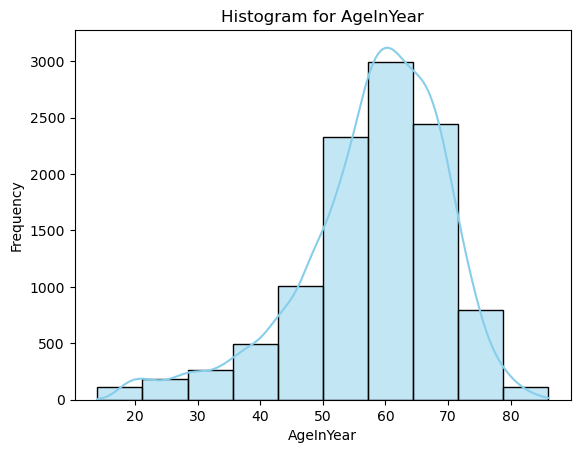

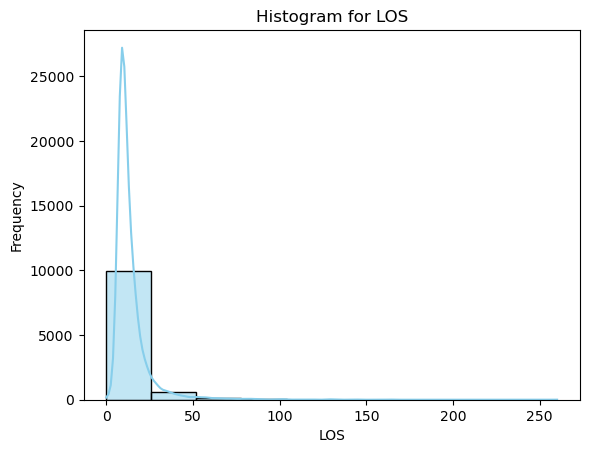

In [43]:
# Plot histogram
plot_histogram_for_columns(surgery_df,selected_columns)

In [44]:
# Define function for a new DataFrame that includes only the binary columns 
def binary_df(dataframe, id_column='ID'):
    bin_columns = [col for col in dataframe.columns if dataframe[col].nunique() == 2] # Identify binary columns
    bin_columns_id = [id_column] + bin_columns # Create a List of Columns to Include
    bin_df = dataframe[bin_columns_id].copy() #Create the New DataFrame

    print('Rows:', bin_df.shape[0])
    print('Columns:', bin_df.shape[1])
    print('Binary columns:', bin_df.shape[1] - 1)
    print('List of binary columns:', list(bin_columns))
    return bin_df # Return the New DataFrame

In [45]:
# Create New DataFrame with binary columns
binary_healthcare_df = binary_df(surgery_df)
binary_healthcare_df.head()

Rows: 10733
Columns: 37
Binary columns: 36
List of binary columns: ['Sex', 'PreviousCardiacNone', 'PreviousCardiacCABG', 'PreviousCardiacValve', 'PreviousCardiacCongenital', 'PreviousCardiacOther', 'PreviousCardiacAscAorta', 'PreviousCardiacDescAorta', 'PreviousCardiacOtherThorac', 'PreviousCardiacCarotid', 'PreviousCardiacOtherPeri', 'OthersPreviousCardiac', 'PulmonaryNone', 'PulmonaryCOPD', 'PulmonaryAsthma', 'PulmonaryTB', 'PulmonaryLong', 'NoHistofNeurological', 'TIAorRIND', 'CVAwithFullRec', 'CVAwithResDef', 'DMNot', 'DMDiet', 'DMOral', 'DMInsulin', 'NoRenalDisease', 'ChronicKidneyDisease', 'ArteriopathNone', 'ArteriopathClaudication', 'ArteriopathAmputation', 'ArteriopathIntervention', 'ArteriopathCarotid', 'ArteriopathAortic', 'VT_VF', 'Completeness', 'PTStatusDischarge']


,ID,Sex,PreviousCardiacNone,PreviousCardiacCABG,PreviousCardiacValve,PreviousCardiacCongenital,PreviousCardiacOther,PreviousCardiacAscAorta,PreviousCardiacDescAorta,PreviousCardiacOtherThorac,...,ChronicKidneyDisease,ArteriopathNone,ArteriopathClaudication,ArteriopathAmputation,ArteriopathIntervention,ArteriopathCarotid,ArteriopathAortic,VT_VF,Completeness,PTStatusDischarge
0,1,MALE,NO,NO,YES,NO,NO,NO,NO,NO,...,NO,YES,NO,NO,NO,NO,NO,NO,COMPLETE,Alive
1,2,FEMALE,YES,NO,NO,NO,NO,NO,NO,NO,...,NO,YES,NO,NO,NO,NO,NO,NO,COMPLETE,Alive
2,3,FEMALE,NO,NO,NO,NO,NO,NO,NO,NO,...,NO,YES,NO,NO,NO,NO,NO,NO,COMPLETE,Alive
3,4,MALE,YES,NO,NO,NO,NO,NO,NO,NO,...,NO,YES,NO,NO,NO,NO,NO,NO,COMPLETE,Alive
4,5,FEMALE,NO,NO,NO,NO,NO,NO,NO,NO,...,NO,YES,NO,NO,NO,NO,NO,NO,COMPLETE,Alive


In [46]:
# Define function for a new DataFrame that includes only the non-binary columns 
def non_binary_df(dataframe, id_column='ID'):
    bin_columns = [col for col in dataframe.columns if dataframe[col].nunique() == 2] # Identify binary columns
    non_bin_columns = [col for col in dataframe.columns if col not in bin_columns and col != id_column]  # Identify non-binary columns
    non_bin_columns_id = [id_column] + non_bin_columns  # Create a List of Columns to Include 
    non_bin_df = dataframe[non_bin_columns_id].copy() # Create the New DataFrame

    print('Rows:', non_bin_df.shape[0])
    print('Columns:', non_bin_df.shape[1])
    print('Non-binary columns:', non_bin_df.shape[1] - 1)
    print('List of non-binary columns:', list(non_bin_columns))
    return non_bin_df

In [47]:
# Create New DataFrame with non-binary columns
non_binary_healthcare_df = non_binary_df(surgery_df)
non_binary_healthcare_df.head()

Rows: 10733
Columns: 43
Non-binary columns: 42
List of non-binary columns: ['RaceName', 'ReligionName', 'CitizenName', 'AdmissionDate', 'DischargeDate', 'AgeInYear', 'GLTypeName', 'PCCardiacProc', 'AnginaStatusPresurgery', 'UnstableAngina', 'DyspneaStatusPresurgery', 'PreviousMI', 'IntervalSurgeryLastMI', 'PoorMobility', 'RFAcquisitionofDiabetic', 'RFAcquisitionofSmoking', 'RFAcquisitionofHypertension', 'PlannedOperation', 'PlannedOperationAorta', 'ActiveEndocarditis', 'ClinicalPOS', 'PreopVentilation', 'PreOpCardiacMassage', 'PreOpAcuteRenalFailure', 'PreopInotropesIABP', 'urgency', 'PreopCretinine', 'PostInfarct', 'RedoOperation', 'MaritalStatus', 'Working', 'CLEjectionFraction', 'CLEjectionSystolic', 'BMI', 'DateInOperation', 'Consultant', 'EuroscoreII', 'LOS', 'Risk Group', 'Category LOS', 'Age Group', 'GLCategories']


,ID,RaceName,ReligionName,CitizenName,AdmissionDate,DischargeDate,AgeInYear,GLTypeName,PCCardiacProc,AnginaStatusPresurgery,...,CLEjectionSystolic,BMI,DateInOperation,Consultant,EuroscoreII,LOS,Risk Group,Category LOS,Age Group,GLCategories
0,1,Malay,Islam,Malaysia,2019-04-13 10:48:00,2019-05-05 15:40:00,53,GOVT - Dependent,Valve alone,CSS (NO SIGN),...,EF: > 50%,Overweight,2019-04-29,F,2.88,22,High risk,Medium(15-30 days),Middle Adulthood(41-59),Government(GOVT)
1,2,Malay,Islam,Malaysia,2019-10-09 07:38:00,2019-10-26 17:08:00,77,PENS - Dependent,Valve and Other,CSS (NO SIGN),...,EF: > 50%,Overweight,2019-10-17,A,6.16,17,Very high risk,Medium(15-30 days),Elderly (Above 60),Pensioner
2,3,Malay,Islam,Malaysia,2020-11-23 10:31:00,2020-12-16 19:53:00,30,Govt Sponsored Patient,other,CSS (NO SIGN),...,EF: > 50%,Normal weight,2020-11-27,G,0.62,23,Low risk,Medium(15-30 days),Early Adulthood(18-40),Government(GOVT)
3,4,Malay,Islam,Malaysia,2018-03-03 08:38:00,2018-03-13 18:50:00,41,GOVT - Staff,Valve alone,CSS (NO SIGN),...,EF: 21 - 30%,Normal weight,2018-03-06,F,1.74,10,Medium-high risk,Short(0-14 days),Middle Adulthood(41-59),Government(GOVT)
4,5,Chinese,Buddhism,Malaysia,2021-01-10 10:42:00,2021-01-19 17:24:00,32,Govt Sponsored Patient,Valve alone,CSS (NO SIGN),...,EF: > 50%,Underweight,2021-01-13,I,0.62,9,Low risk,Short(0-14 days),Early Adulthood(18-40),Government(GOVT)


# 8.0 Univariate EDA

In [48]:
# Define function for pie charts plot
def plot_pie_charts(df, unique_id_column):
    # Drop the unique ID column if it exists
    df = df.drop(columns=[unique_id_column], errors='ignore')
    
    # Filter out rows where any column contains 'UNKNOWN'
    df = df.applymap(lambda x: x if x != 'UNKNOWN' else None).dropna()
    
    # Determine Number of Columns and Rows for Subplots
    num_columns = df.shape[1]
    num_rows = (num_columns + 1) // 2
    
    # Create Subplots
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    
    # Flatten the Axes Array
    axes = axes.flatten()
    
    # Plot Pie Charts
    for i in range(0, num_columns, 2):
        column1 = df.columns[i]
        column2 = df.columns[i + 1] if i + 1 < num_columns else None
        
        data_counts1 = df[column1].value_counts()
        wedges1, texts1, autotexts1 = axes[i].pie(data_counts1, labels=data_counts1.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p/100*sum(data_counts1)),
                                                 startangle=90, textprops=dict(color="w"))
        
        axes[i].set_title(column1)
        axes[i].legend(data_counts1.index, title=column1, loc="upper right") 
        
        if column2:
            data_counts2 = df[column2].value_counts()
            wedges2, texts2, autotexts2 = axes[i + 1].pie(data_counts2, labels=data_counts2.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p/100*sum(data_counts2)),
                                                         startangle=90, textprops=dict(color="w"))
            
            axes[i + 1].set_title(column2)
            axes[i + 1].legend(data_counts2.index, title=column2, loc="upper right") 
    
    plt.tight_layout()
    plt.show()

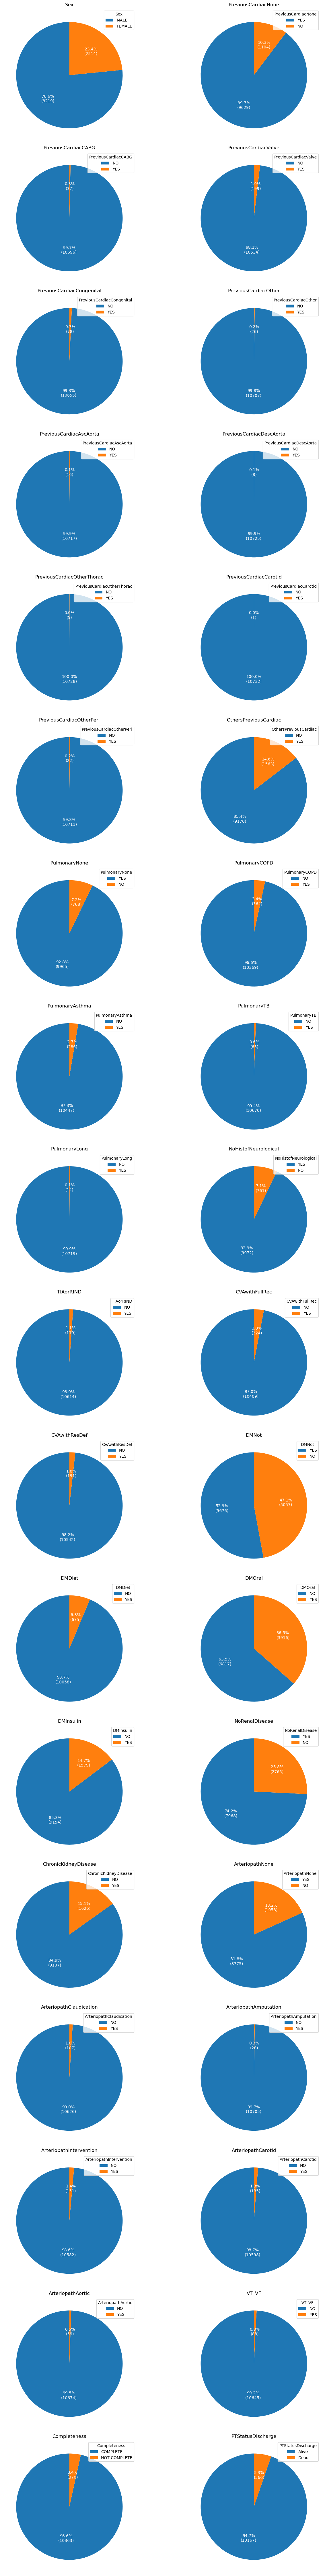

In [49]:
# Plot pie charts for binary columns
plot_pie_charts(binary_healthcare_df, 'ID')

In [50]:
from tabulate import tabulate

def display_tables(df, unique_id_column):
    # Exclude the unique identifier column from the DataFrame
    df = df.drop(columns=[unique_id_column], errors='ignore')
    
    # Filter out rows where any column contains 'UNKNOWN'
    df = df.applymap(lambda x: x if x != 'UNKNOWN' else None).dropna()
    
    # Iterate through each column and display a table for the percentage and count
    for column in df.columns:
        # Calculate percentage and count for each unique value in the column
        data_counts = df[column].value_counts(normalize=True)
        
        # Convert the data to a DataFrame for better tabulation
        table_data = pd.DataFrame({
            'Value': data_counts.index,
            'Count/Percentage': data_counts.mul(len(df)).astype(int).astype(str) + " (" + (data_counts * 100).round(2).astype(str) + "%)"
        })
        
        # Display the table using tabulate
        print(f"Table for column: {column}")
        print(tabulate(table_data, headers='keys', tablefmt='pretty', showindex=False))
        print("\n")

In [51]:
# Display tables for binary columns
display_tables(binary_healthcare_df, 'ID')

Table for column: Sex
+--------+------------------+
| Value  | Count/Percentage |
+--------+------------------+
|  MALE  |  8219 (76.58%)   |
| FEMALE |  2514 (23.42%)   |
+--------+------------------+


Table for column: PreviousCardiacNone
+-------+------------------+
| Value | Count/Percentage |
+-------+------------------+
|  YES  |  9629 (89.71%)   |
|  NO   |  1104 (10.29%)   |
+-------+------------------+


Table for column: PreviousCardiacCABG
+-------+------------------+
| Value | Count/Percentage |
+-------+------------------+
|  NO   |  10696 (99.66%)  |
|  YES  |    37 (0.34%)    |
+-------+------------------+


Table for column: PreviousCardiacValve
+-------+------------------+
| Value | Count/Percentage |
+-------+------------------+
|  NO   |  10534 (98.15%)  |
|  YES  |   198 (1.85%)    |
+-------+------------------+


Table for column: PreviousCardiacCongenital
+-------+------------------+
| Value | Count/Percentage |
+-------+------------------+
|  NO   |  10655 (99.2

In [52]:
# Drop non-categorical columns
non_binary_healthcare_df.drop(columns=['AdmissionDate', 'DischargeDate', 
                                       'AgeInYear', 'CLEjectionFraction', 
                                       'DateInOperation','EuroscoreII', 'LOS'], inplace=True)

In [53]:
def plot_bar_charts(df, unique_id_column):
    # Drop the unique ID column if it exists
    df = df.drop(columns=[unique_id_column], errors='ignore')
    
    # Filter out rows where any column contains 'UNKNOWN'
    df = df.applymap(lambda x: x if x != 'UNKNOWN' else None).dropna()
    
    # Determine Number of Columns for Subplots
    num_columns = df.shape[1]
    
    # Create Subplots
    fig, axes = plt.subplots(num_columns, 1, figsize=(8, num_columns * 5), squeeze=False)
    
    # Plot bar chart for the current column
    for i, column in enumerate(df.columns):
        data_counts = df[column].value_counts(normalize=True)
        data_counts.plot(kind='bar', ax=axes[i, 0], color='skyblue', edgecolor='black', rot=0)
        axes[i, 0].set_title(column)
        axes[i, 0].set_ylabel('Percentage')
        
        for p in axes[i, 0].patches:
            height = p.get_height()
            count = height * len(df[column])
            axes[i, 0].annotate(f'{height * 100:.1f}%\n({count:.0f})', 
                                (p.get_x() + p.get_width() / 2., height),
                                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    plt.tight_layout()
    plt.show()

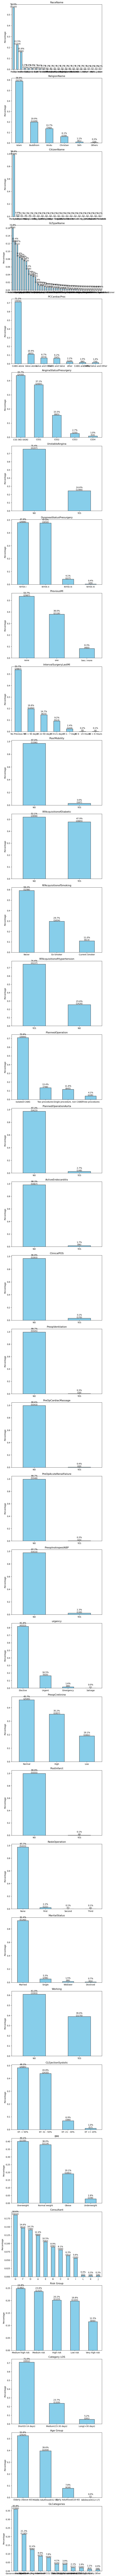

In [54]:
# Plot bar charts for non-binary columns
plot_bar_charts(non_binary_healthcare_df,'ID')

In [55]:
# Display tables for non-binary columns
display_tables(non_binary_healthcare_df, 'ID')

Table for column: RaceName
+--------------------------+------------------+
|          Value           | Count/Percentage |
+--------------------------+------------------+
|          Malay           |   3143 (56.5%)   |
|         Chinese          |  1254 (22.54%)   |
|          Indian          |   880 (15.82%)   |
|         Punjabi          |    55 (0.99%)    |
|         Malaysia         |    47 (0.84%)    |
|        Indonesian        |    43 (0.77%)    |
|           Iban           |    38 (0.68%)    |
|          Others          |    31 (0.56%)    |
|         Bidayuh          |    16 (0.29%)    |
|         Melanau          |    6 (0.11%)     |
|         Eurasian         |    6 (0.11%)     |
|      Melayu Sarawak      |    5 (0.09%)     |
| Other Bumiputera Sarawak |    5 (0.09%)     |
|          Bajau           |    5 (0.09%)     |
|  Other Bumiputera Sabah  |    5 (0.09%)     |
|      Indian Muslim       |    4 (0.07%)     |
|          Dusun           |    3 (0.05%)     |
|           A

# 9.0 Multivariate EDA

In [56]:
# Define function for grouped bar chart and crosstab for LOS
def plot_and_tabulate_LOS(df, column_name):
    # Filter out rows where the column_name contains 'unknown'
    df_filtered = df[df[column_name] != 'UNKNOWN']
    
    # Plotting the grouped bar chart
    def plot_grouped_bar_chart_LOS(df_filtered, column_name):
        # Grouping the DataFrame by 'Category LOS' and the specified column and counting occurrences
        grouped = df_filtered.groupby(['Category LOS', column_name]).size().unstack()

        # Extracting unique categories and Category LOS values
        categories = grouped.columns
        statuses = grouped.index

        # Setting the width of the bars
        bar_width = 0.35

        # Index for x-axis
        x = np.arange(len(categories))

        # Creating the plot
        fig, ax = plt.subplots()
        for i, status in enumerate(statuses):
            ax.bar(x + i * bar_width, grouped.loc[status], bar_width, label=status)

        # Adding labels, title, and legend
        ax.set_xlabel(column_name)
        ax.set_ylabel('Count of Category LOS')
        ax.set_title('Count of Category LOS by ' + column_name)
        ax.set_xticks(x + bar_width * len(statuses) / 2 - bar_width / 2)
        ax.set_xticklabels(categories)
        ax.legend()

        plt.show()

    # Creating the crosstab
    def create_cross_tabulation_LOS(df_filtered, column_name):
        # Create the cross-tabulation
        cross_tab = pd.crosstab(df_filtered['Category LOS'], df_filtered[column_name])
        
        # Calculate the percentages
        cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
        
        # Combine the counts and percentages into a single DataFrame
        cross_tab_with_percent = pd.concat([cross_tab, cross_tab_percent], axis=1, keys=['Count', 'Percent'])
        
        return cross_tab_with_percent
    
    # Call the plotting function
    plot_grouped_bar_chart_LOS(df_filtered, column_name)
    
    # Call the tabulation function and return the result
    return create_cross_tabulation_LOS(df_filtered, column_name)

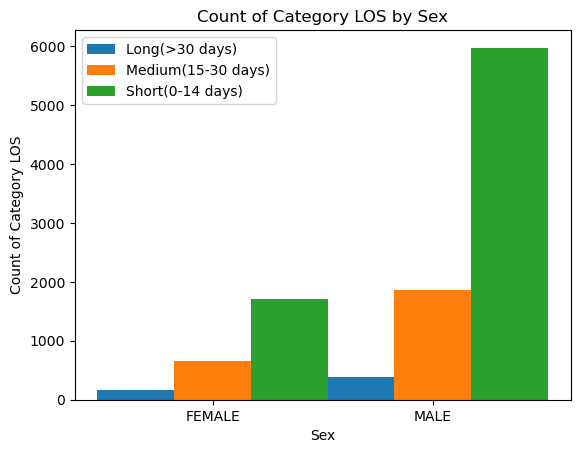

Count          Percent           
Sex                FEMALE  MALE     FEMALE       MALE
Category LOS                                         
Long(>30 days)        158   386  29.044118  70.955882
Medium(15-30 days)    655  1861  26.033386  73.966614
Short(0-14 days)     1701  5972  22.168643  77.831357

In [57]:
# Plot grouped bar chart and crosstab by 'Sex'
plot_and_tabulate_LOS(surgery_df, 'Sex')

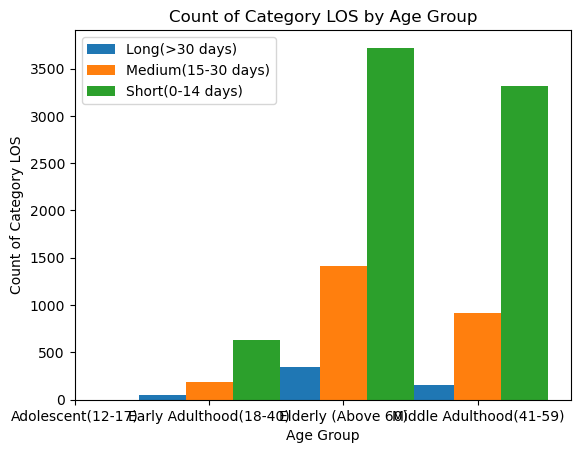

Count                         \
Age Group          Adolescent(12-17) Early Adulthood(18-40)   
Category LOS                                                  
Long(>30 days)                     0                     50   
Medium(15-30 days)                 0                    189   
Short(0-14 days)                   1                    636   

                                                               \
Age Group          Elderly (Above 60) Middle Adulthood(41-59)   
Category LOS                                                    
Long(>30 days)                    343                     151   
Medium(15-30 days)               1409                     918   
Short(0-14 days)                 3720                    3316   

                             Percent                         \
Age Group          Adolescent(12-17) Early Adulthood(18-40)   
Category LOS                                                  
Long(>30 days)              0.000000               9.191176   
Medium(15-30 days)          0.000000               7.511924   
Short(0-14 days)            0.013033               8.288805   

                                                               
Age Group          Elderly (Above 60) Middle Adulthood(41-59)  
Category LOS                                                   
Long(>30 days)              63.051471               27.757353  
Medium(15-30 days)          56.001590               36.486486  
Short(0-14 days)            48.481689               43.216473

In [58]:
# Plot grouped bar chart and crosstab by 'Age Group'
plot_and_tabulate_LOS(surgery_df, 'Age Group')

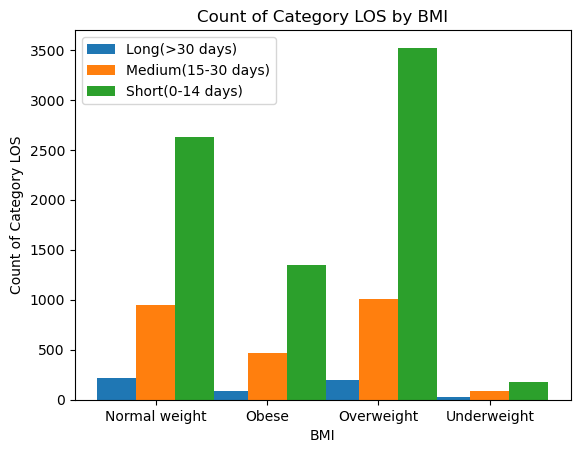

Count                                    Percent  \
BMI                Normal weight Obese Overweight Underweight Normal weight   
Category LOS                                                                  
Long(>30 days)               221    92        199          32     40.625000   
Medium(15-30 days)           952   466       1011          87     37.837838   
Short(0-14 days)            2626  1352       3521         174     34.223902   

                                                      
BMI                     Obese Overweight Underweight  
Category LOS                                          
Long(>30 days)      16.911765  36.580882    5.882353  
Medium(15-30 days)  18.521463  40.182830    3.457870  
Short(0-14 days)    17.620227  45.888179    2.267692

In [59]:
# Plot grouped bar chart and crosstab by 'BMI'
plot_and_tabulate_LOS(surgery_df, 'BMI')

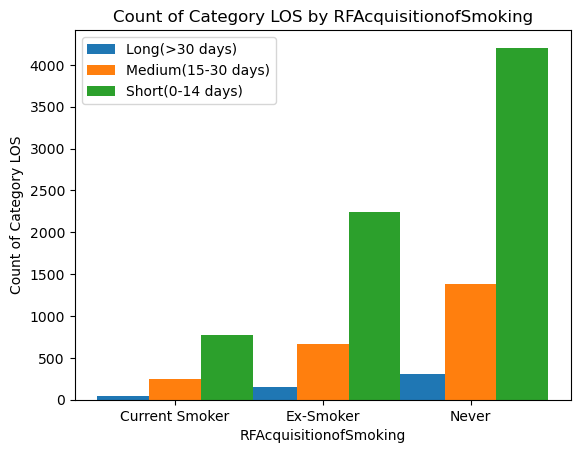

Count                        Percent  \
RFAcquisitionofSmoking Current Smoker Ex-Smoker Never Current Smoker   
Category LOS                                                           
Long(>30 days)                     44       149   303       8.870968   
Medium(15-30 days)                252       671  1377      10.956522   
Short(0-14 days)                  778      2239  4205      10.772639   

                                              
RFAcquisitionofSmoking  Ex-Smoker      Never  
Category LOS                                  
Long(>30 days)          30.040323  61.088710  
Medium(15-30 days)      29.173913  59.869565  
Short(0-14 days)        31.002492  58.224868

In [60]:
# Plot grouped bar chart and crosstab by 'RFAcquisitionofSmoking'
plot_and_tabulate_LOS(surgery_df, 'RFAcquisitionofSmoking')

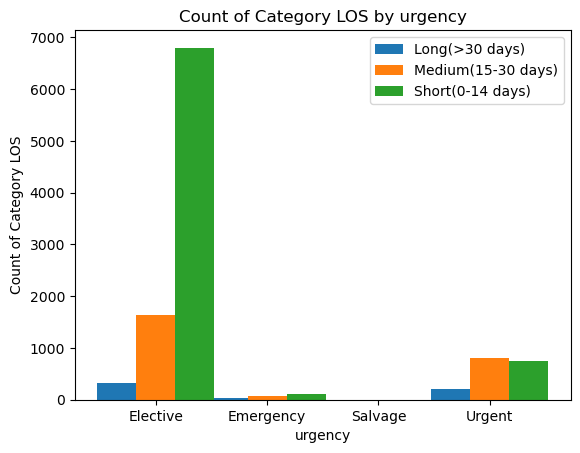

Count                             Percent            \
urgency            Elective Emergency Salvage Urgent   Elective Emergency   
Category LOS                                                                
Long(>30 days)          314        26       0    204  57.720588  4.779412   
Medium(15-30 days)     1636        67       1    812  65.023847  2.662957   
Short(0-14 days)       6801       120       3    748  88.647028  1.564129   

                                         
urgency              Salvage     Urgent  
Category LOS                             
Long(>30 days)      0.000000  37.500000  
Medium(15-30 days)  0.039746  32.273450  
Short(0-14 days)    0.039103   9.749739

In [61]:
# Plot grouped bar chart and crosstab by 'urgency'
plot_and_tabulate_LOS(surgery_df, 'urgency')

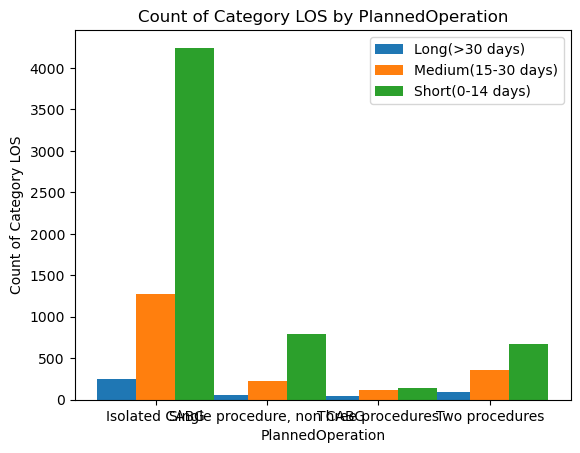

Count                                              \
PlannedOperation   Isolated CABG Single procedure, non CABG Three procedures   
Category LOS                                                                   
Long(>30 days)               247                         54               48   
Medium(15-30 days)          1280                        222              120   
Short(0-14 days)            4244                        791              140   

                                        Percent                             \
PlannedOperation   Two procedures Isolated CABG Single procedure, non CABG   
Category LOS                                                                 
Long(>30 days)                 90     56.264237                  12.300683   
Medium(15-30 days)            356     64.711830                  11.223458   
Short(0-14 days)              673     72.571819                  13.525992   

                                                    
PlannedOperation   Three procedures Two procedures  
Category LOS                                        
Long(>30 days)            10.933941      20.501139  
Medium(15-30 days)         6.066734      17.997978  
Short(0-14 days)           2.393981      11.508208

In [62]:
# Plot grouped bar chart and crosstab by 'PlannedOperation'
plot_and_tabulate_LOS(surgery_df, 'PlannedOperation')

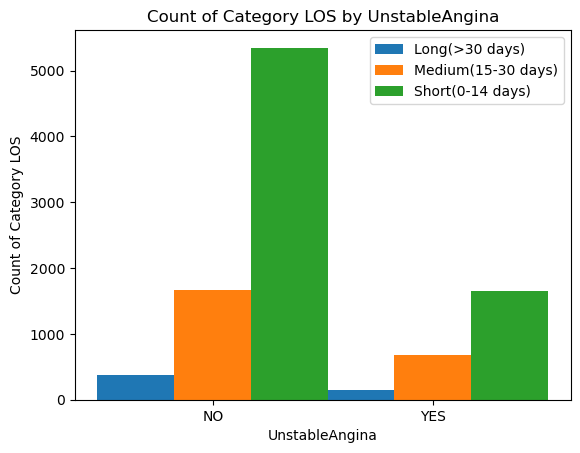

Count          Percent           
UnstableAngina        NO   YES         NO        YES
Category LOS                                        
Long(>30 days)       369   148  71.373308  28.626692
Medium(15-30 days)  1668   685  70.888228  29.111772
Short(0-14 days)    5346  1653  76.382340  23.617660

In [63]:
# Plot grouped bar chart and crosstab by 'UnstableAngina'
plot_and_tabulate_LOS(surgery_df, 'UnstableAngina')

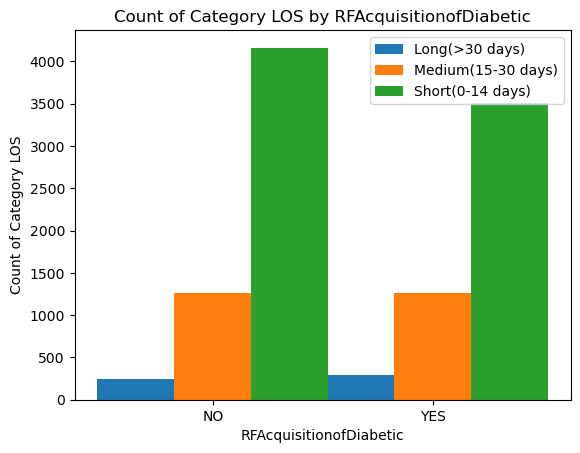

Count          Percent           
RFAcquisitionofDiabetic    NO   YES         NO        YES
Category LOS                                             
Long(>30 days)            247   297  45.404412  54.595588
Medium(15-30 days)       1259  1256  50.059642  49.940358
Short(0-14 days)         4162  3506  54.277517  45.722483

In [64]:
# Plot grouped bar chart and crosstab by 'RFAcquisitionofDiabetic'
plot_and_tabulate_LOS(surgery_df, 'RFAcquisitionofDiabetic')

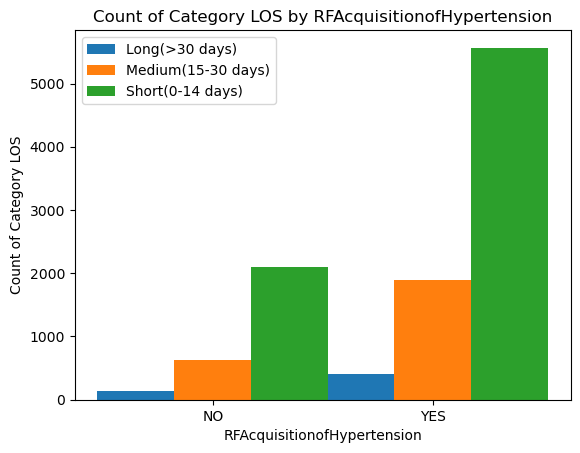

Count          Percent           
RFAcquisitionofHypertension    NO   YES         NO        YES
Category LOS                                                 
Long(>30 days)                133   409  24.538745  75.461255
Medium(15-30 days)            622  1889  24.771008  75.228992
Short(0-14 days)             2096  5566  27.355782  72.644218

In [65]:
# Plot grouped bar chart and crosstab by 'RFAcquisitionofHypertension'
plot_and_tabulate_LOS(surgery_df, 'RFAcquisitionofHypertension')

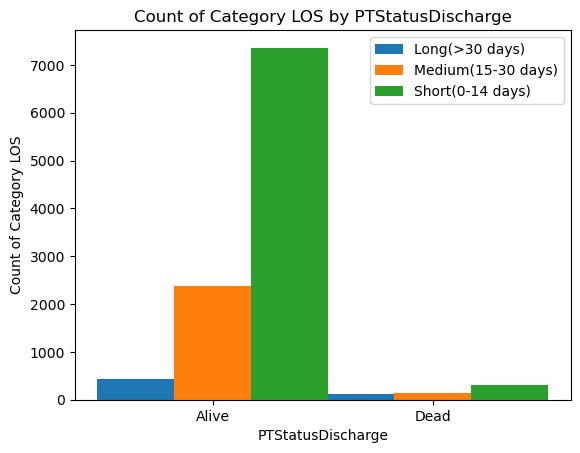

Count         Percent           
PTStatusDischarge  Alive Dead      Alive       Dead
Category LOS                                       
Long(>30 days)       431  113  79.227941  20.772059
Medium(15-30 days)  2378  138  94.515103   5.484897
Short(0-14 days)    7358  315  95.894696   4.105304

In [66]:
# Plot grouped bar chart and crosstab by 'PTStatusDischarge'
plot_and_tabulate_LOS(surgery_df, 'PTStatusDischarge')

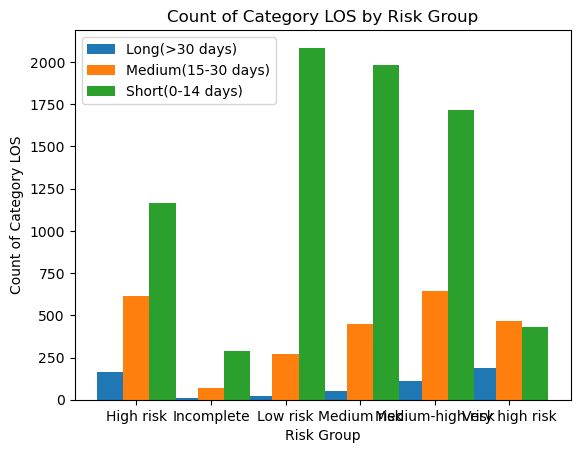

Count                                                   \
Risk Group         High risk Incomplete Low risk Medium risk Medium-high risk   
Category LOS                                                                    
Long(>30 days)           163         12       20          50              109   
Medium(15-30 days)       616         68      270         449              646   
Short(0-14 days)        1163        290     2085        1984             1718   

                                     Percent                        \
Risk Group         Very high risk  High risk Incomplete   Low risk   
Category LOS                                                         
Long(>30 days)                190  29.963235   2.205882   3.676471   
Medium(15-30 days)            467  24.483307   2.702703  10.731320   
Short(0-14 days)              433  15.157044   3.779487  27.173205   

                                                                
Risk Group         Medium risk Medium-high risk Very high risk  
Category LOS                                                    
Long(>30 days)        9.191176        20.036765      34.926471  
Medium(15-30 days)   17.845787        25.675676      18.561208  
Short(0-14 days)     25.856901        22.390199       5.643164

In [67]:
# Plot grouped bar chart and crosstab by 'Risk Group'
plot_and_tabulate_LOS(surgery_df, 'Risk Group')

In [68]:
# Define function for grouped bar chart and crosstab for mortality
def plot_and_tabulate_mortality(df, column_name):
    # Filter out rows where the column_name contains 'unknown'
    df_filtered = df[df[column_name] != 'UNKNOWN']
    
    # Plotting the grouped bar chart
    def plot_grouped_bar_chart_mortality(df_filtered, column_name):
        # Grouping the DataFrame by 'PTStatusDischarge' and the specified column and counting occurrences
        grouped = df_filtered.groupby(['PTStatusDischarge', column_name]).size().unstack()

        # Extracting unique categories and PTStatusDischarge values
        categories = grouped.columns
        statuses = grouped.index

        # Setting the width of the bars
        bar_width = 0.35

        # Index for x-axis
        x = np.arange(len(categories))

        # Creating the plot
        fig, ax = plt.subplots()
        for i, status in enumerate(statuses):
            ax.bar(x + i * bar_width, grouped.loc[status], bar_width, label=status)

        # Adding labels, title, and legend
        ax.set_xlabel(column_name)
        ax.set_ylabel('Count of PTStatusDischarge')
        ax.set_title('Count of PTStatusDischarge by ' + column_name)
        ax.set_xticks(x + bar_width * len(statuses) / 2 - bar_width / 2)
        ax.set_xticklabels(categories)
        ax.legend()

        plt.show()

    # Creating the crosstab
    def create_cross_tabulation_mortality(df_filtered, column_name):
        # Create the cross-tabulation
        cross_tab = pd.crosstab(df_filtered['PTStatusDischarge'], df_filtered[column_name])
        
        # Calculate the percentages
        cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
        
        # Combine the counts and percentages into a single DataFrame
        cross_tab_with_percent = pd.concat([cross_tab, cross_tab_percent], axis=1, keys=['Count', 'Percent'])
        
        return cross_tab_with_percent
    
    # Call the plotting function
    plot_grouped_bar_chart_mortality(df_filtered, column_name)
    
    # Call the tabulation function and return the result
    return create_cross_tabulation_mortality(df_filtered, column_name)

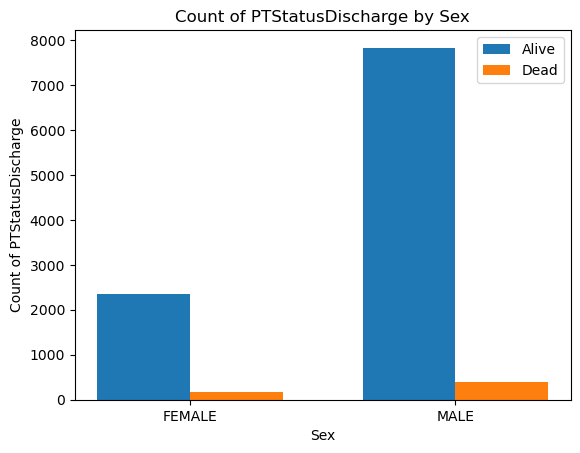

Count          Percent           
Sex               FEMALE  MALE     FEMALE       MALE
PTStatusDischarge                                   
Alive               2340  7827  23.015639  76.984361
Dead                 174   392  30.742049  69.257951

In [69]:
# Plot grouped bar chart and crosstab by 'Sex'
plot_and_tabulate_mortality (surgery_df, 'Sex')

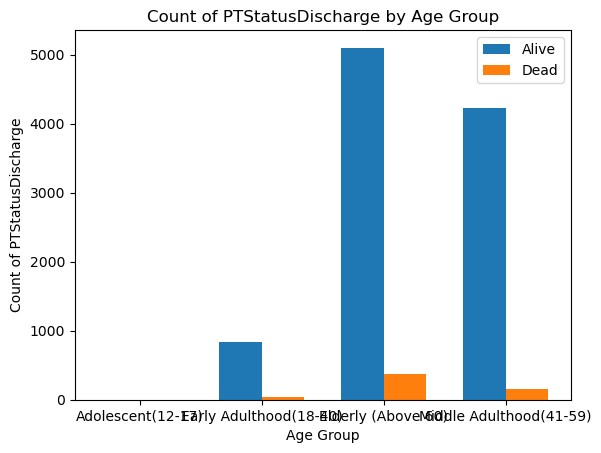

Count                                            \
Age Group         Adolescent(12-17) Early Adulthood(18-40) Elderly (Above 60)   
PTStatusDischarge                                                               
Alive                             1                    837               5102   
Dead                              0                     38                370   

                                                    Percent  \
Age Group         Middle Adulthood(41-59) Adolescent(12-17)   
PTStatusDischarge                                             
Alive                                4227          0.009836   
Dead                                  158          0.000000   

                                                             \
Age Group         Early Adulthood(18-40) Elderly (Above 60)   
PTStatusDischarge                                             
Alive                           8.232517          50.181961   
Dead                            6.713781          65.371025   

                                           
Age Group         Middle Adulthood(41-59)  
PTStatusDischarge                          
Alive                           41.575686  
Dead                            27.915194

In [70]:
# Plot grouped bar chart and crosstab by 'Age Group'
plot_and_tabulate_mortality (surgery_df, 'Age Group')

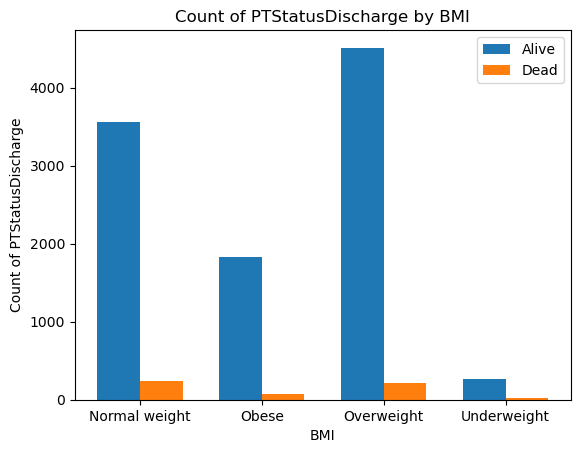

Count                                    Percent  \
BMI               Normal weight Obese Overweight Underweight Normal weight   
PTStatusDischarge                                                            
Alive                      3558  1831       4513         265     34.995574   
Dead                        241    79        218          28     42.579505   

                                                     
BMI                    Obese Overweight Underweight  
PTStatusDischarge                                    
Alive              18.009246  44.388709    2.606472  
Dead               13.957597  38.515901    4.946996

In [71]:
# Plot grouped bar chart and crosstab by 'BMI'
plot_and_tabulate_mortality (surgery_df, 'BMI')

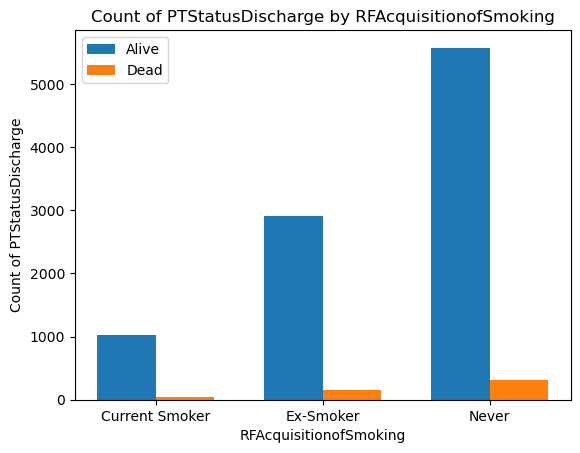

Count                        Percent  \
RFAcquisitionofSmoking Current Smoker Ex-Smoker Never Current Smoker   
PTStatusDischarge                                                      
Alive                            1024      2904  5574      10.776679   
Dead                               50       155   311       9.689922   

                                              
RFAcquisitionofSmoking  Ex-Smoker      Never  
PTStatusDischarge                             
Alive                   30.561987  58.661334  
Dead                    30.038760  60.271318

In [72]:
# Plot grouped bar chart and crosstab by 'RFAcquisitionofSmoking'
plot_and_tabulate_mortality (surgery_df, 'RFAcquisitionofSmoking')

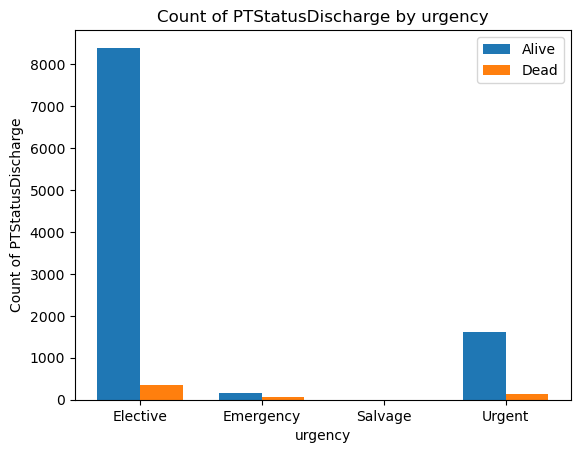

Count                             Percent             \
urgency           Elective Emergency Salvage Urgent   Elective  Emergency   
PTStatusDischarge                                                           
Alive                 8390       156       4   1616  82.530002   1.534527   
Dead                   361        57       0    148  63.780919  10.070671   

                                        
urgency             Salvage     Urgent  
PTStatusDischarge                       
Alive              0.039347  15.896124  
Dead               0.000000  26.148410

In [73]:
# Plot grouped bar chart and crosstab by 'urgency'
plot_and_tabulate_mortality (surgery_df, 'urgency')

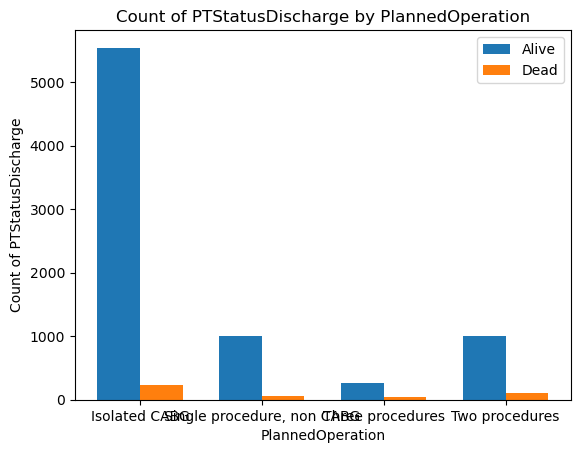

Count                                              \
PlannedOperation  Isolated CABG Single procedure, non CABG Three procedures   
PTStatusDischarge                                                             
Alive                      5539                       1006              262   
Dead                        232                         61               46   

                                       Percent                             \
PlannedOperation  Two procedures Isolated CABG Single procedure, non CABG   
PTStatusDischarge                                                           
Alive                       1008     70.876520                  12.872681   
Dead                         111     51.555556                  13.555556   

                                                   
PlannedOperation  Three procedures Two procedures  
PTStatusDischarge                                  
Alive                     3.352527      12.898273  
Dead                     10.222222      24.666667

In [74]:
# Plot grouped bar chart and crosstab by 'PlannedOperation'
plot_and_tabulate_mortality (surgery_df, 'PlannedOperation')

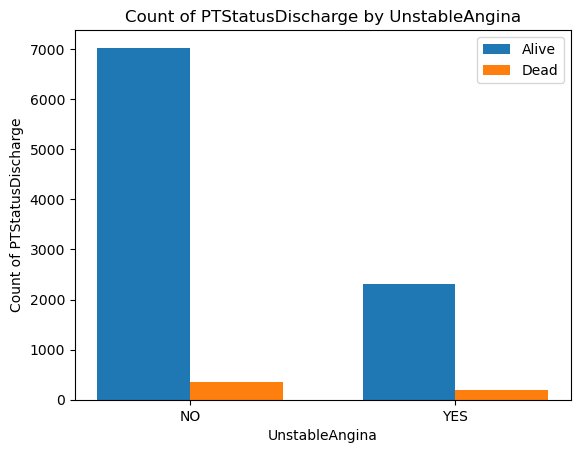

Count          Percent           
UnstableAngina       NO   YES         NO        YES
PTStatusDischarge                                  
Alive              7025  2301  75.327043  24.672957
Dead                358   185  65.930018  34.069982

In [75]:
# Plot grouped bar chart and crosstab by 'UnstableAngina'
plot_and_tabulate_mortality (surgery_df, 'UnstableAngina')

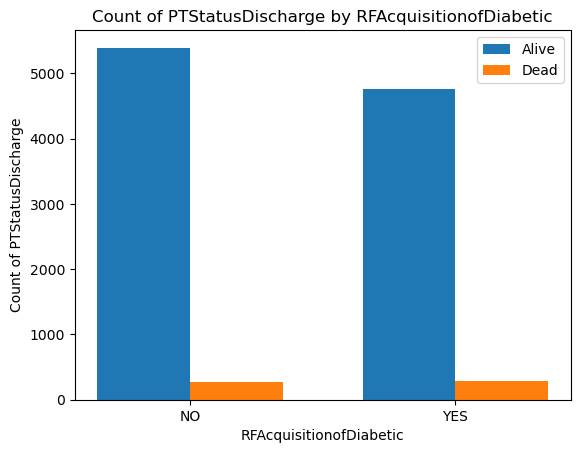

Count          Percent           
RFAcquisitionofDiabetic    NO   YES         NO        YES
PTStatusDischarge                                        
Alive                    5395  4767  53.089943  46.910057
Dead                      273   292  48.318584  51.681416

In [76]:
# Plot grouped bar chart and crosstab by 'RFAcquisitionofDiabetic'
plot_and_tabulate_mortality (surgery_df, 'RFAcquisitionofDiabetic')

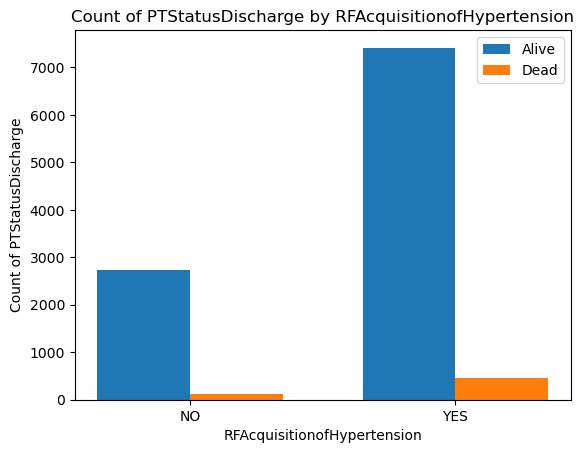

Count          Percent           
RFAcquisitionofHypertension    NO   YES         NO        YES
PTStatusDischarge                                            
Alive                        2736  7415  26.953010  73.046990
Dead                          115   449  20.390071  79.609929

In [77]:
# Plot grouped bar chart and crosstab by 'RFAcquisitionofHypertension'
plot_and_tabulate_mortality (surgery_df, 'RFAcquisitionofHypertension')

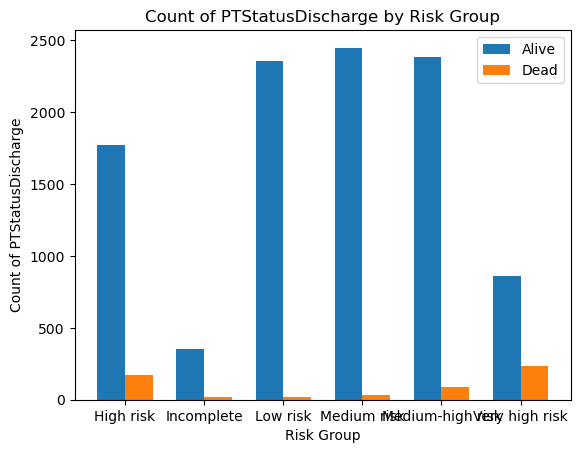

Count                                                   \
Risk Group        High risk Incomplete Low risk Medium risk Medium-high risk   
PTStatusDischarge                                                              
Alive                  1770        353     2357        2447             2383   
Dead                    172         17       18          36               90   

                                    Percent                                    \
Risk Group        Very high risk  High risk Incomplete   Low risk Medium risk   
PTStatusDischarge                                                               
Alive                        857  17.409265   3.472017  23.182846   24.068063   
Dead                         233  30.388693   3.003534   3.180212    6.360424   

                                                   
Risk Group        Medium-high risk Very high risk  
PTStatusDischarge                                  
Alive                    23.438576       8.429232  
Dead                     15.901060      41.166078

In [78]:
# Plot grouped bar chart and crosstab by 'Risk Group'
plot_and_tabulate_mortality (surgery_df, 'Risk Group')

# 10.0 Statistical Analysis

In [79]:
from scipy.stats import chi2_contingency

In [80]:
# Select columns for correlation analysis
cor_df = surgery_df[['Category LOS', 'PTStatusDischarge', 'Sex',  'Age Group', 'BMI', 'RFAcquisitionofSmoking', 
                    'urgency','PlannedOperation', 'UnstableAngina', 'RFAcquisitionofHypertension', 
                    'RFAcquisitionofDiabetic', 'Risk Group',"GLCategories","Working","CLEjectionSystolic",
                     "NoRenalDisease", "ChronicKidneyDisease", "PreopCretinine","RedoOperation","PreviousMI",
                     "PreviousCardiacNone","DyspneaStatusPresurgery"]]
cor_df.head()

,Category LOS,PTStatusDischarge,Sex,Age Group,BMI,RFAcquisitionofSmoking,urgency,PlannedOperation,UnstableAngina,RFAcquisitionofHypertension,...,GLCategories,Working,CLEjectionSystolic,NoRenalDisease,ChronicKidneyDisease,PreopCretinine,RedoOperation,PreviousMI,PreviousCardiacNone,DyspneaStatusPresurgery
0,Medium(15-30 days),Alive,MALE,Middle Adulthood(41-59),Overweight,Never,Elective,Two procedures,NO,NO,...,Government(GOVT),YES,EF: > 50%,YES,NO,Normal,First,none,NO,NYHA II
1,Medium(15-30 days),Alive,FEMALE,Elderly (Above 60),Overweight,Never,Elective,Two procedures,NO,YES,...,Pensioner,NO,EF: > 50%,YES,NO,High,None,none,YES,NYHA II
2,Medium(15-30 days),Alive,FEMALE,Early Adulthood(18-40),Normal weight,Never,Elective,"Single procedure, non CABG",NO,NO,...,Government(GOVT),NO,EF: > 50%,YES,NO,Low,None,none,NO,NYHA I
3,Short(0-14 days),Alive,MALE,Middle Adulthood(41-59),Normal weight,Never,Elective,UNKNOWN,NO,NO,...,Government(GOVT),YES,EF: 21 - 30%,YES,NO,Normal,None,none,YES,NYHA II
4,Short(0-14 days),Alive,FEMALE,Early Adulthood(18-40),Underweight,Never,Elective,"Single procedure, non CABG",NO,NO,...,Government(GOVT),NO,EF: > 50%,YES,NO,Low,None,none,NO,NYHA I


In [81]:
# Drop rows where any column has the value 'UNKNOWN'
df_cleaned = cor_df[~cor_df.isin(['UNKNOWN']).any(axis=1)]

In [82]:
# Function to calculate chi-square test and Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Function to create the matrices
def calculate_cramers_v_matrix(df, columns):
    n = len(columns)
    chi2_matrix = pd.DataFrame(np.zeros((n, n)), index=columns, columns=columns)
    cramers_v_matrix = pd.DataFrame(np.zeros((n, n)), index=columns, columns=columns)

    for i in range(n):
        for j in range(i, n):
            if i == j:
                chi2_matrix.iloc[i, j] = np.nan
                cramers_v_matrix.iloc[i, j] = np.nan
            else:
                confusion_matrix = pd.crosstab(df[columns[i]], df[columns[j]])
                chi2, p, _, _ = chi2_contingency(confusion_matrix)
                chi2_matrix.iloc[i, j] = p
                chi2_matrix.iloc[j, i] = p
                cv = cramers_v(confusion_matrix)
                cramers_v_matrix.iloc[i, j] = cv
                cramers_v_matrix.iloc[j, i] = cv

    return chi2_matrix, cramers_v_matrix

# Plotting function
def plot_heatmaps(chi2_matrix, cramers_v_matrix):
    fig, ax = plt.subplots(1, 2, figsize=(18, 8))
    
    sns.heatmap(chi2_matrix, annot=True, cmap='coolwarm', ax=ax[0])
    ax[0].set_title('Chi-square Test P-values')
    
    sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', ax=ax[1])
    ax[1].set_title("Cramér's V Correlation")
    
    plt.show()

C:\Users\afiq_\AppData\Local\Temp\ipykernel_20620\2403482891.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype('category')
C:\Users\afiq_\AppData\Local\Temp\ipykernel_20620\2403482891.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype('category')
C:\Users\afiq_\AppData\Local\Temp\ipykernel_20620\2403482891.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

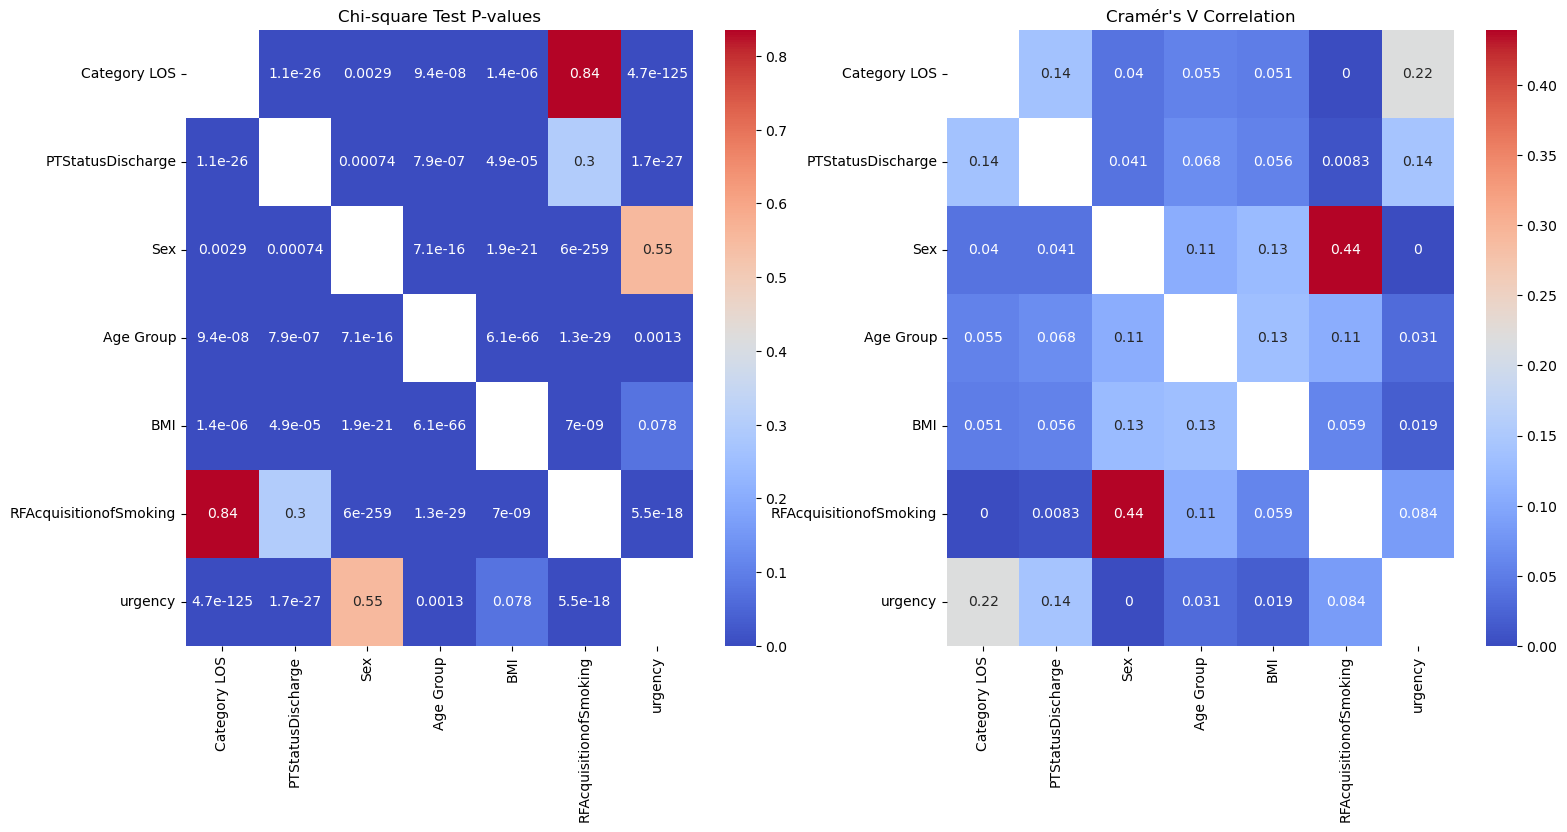

In [83]:
# List of categorical columns to analyze
categorical_columns = ['Category LOS', 'PTStatusDischarge', 'Sex',  'Age Group', 'BMI', 'RFAcquisitionofSmoking', 
                       'urgency']

# Ensure all columns are categorical
for col in categorical_columns:
    df_cleaned[col] = df_cleaned[col].astype('category')

# Calculate matrices
chi2_matrix, cramers_v_matrix = calculate_cramers_v_matrix(df_cleaned, categorical_columns)

# Plot heatmaps
plot_heatmaps(chi2_matrix, cramers_v_matrix)

C:\Users\afiq_\AppData\Local\Temp\ipykernel_20620\1303834148.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype('category')
C:\Users\afiq_\AppData\Local\Temp\ipykernel_20620\1303834148.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype('category')
C:\Users\afiq_\AppData\Local\Temp\ipykernel_20620\1303834148.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

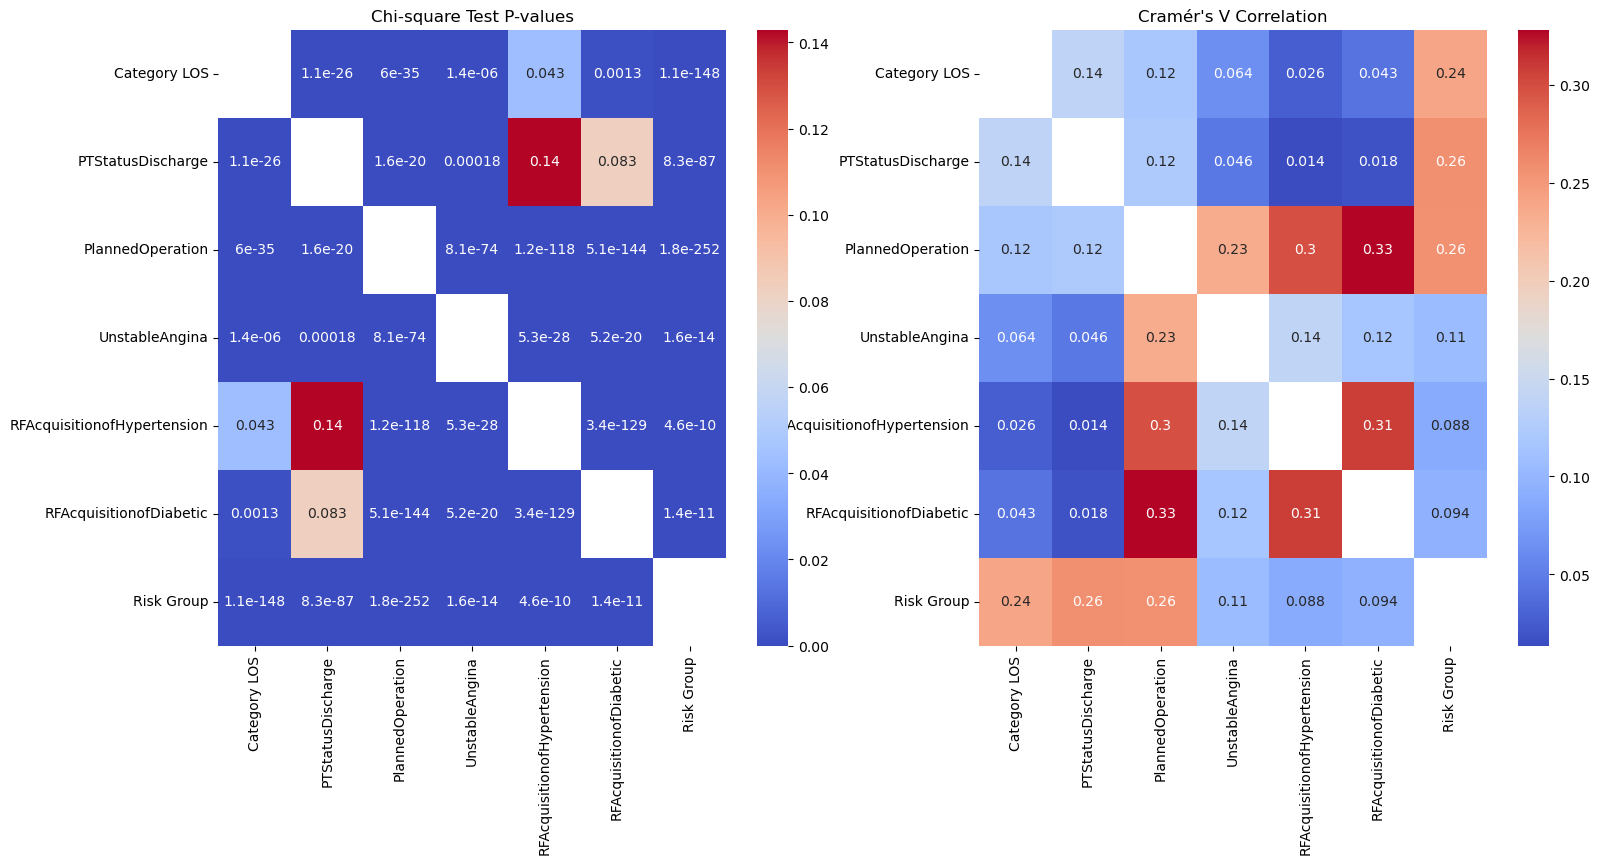

In [84]:
# List of categorical columns to analyze
categorical_columns = ['Category LOS', 'PTStatusDischarge', 'PlannedOperation', 'UnstableAngina', 'RFAcquisitionofHypertension', 
                       'RFAcquisitionofDiabetic', 'Risk Group']

# Ensure all columns are categorical
for col in categorical_columns:
    df_cleaned[col] = df_cleaned[col].astype('category')

# Calculate matrices
chi2_matrix, cramers_v_matrix = calculate_cramers_v_matrix(df_cleaned, categorical_columns)

# Plot heatmaps
plot_heatmaps(chi2_matrix, cramers_v_matrix)

C:\Users\afiq_\AppData\Local\Temp\ipykernel_20620\2980082390.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype('category')
C:\Users\afiq_\AppData\Local\Temp\ipykernel_20620\2980082390.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype('category')
C:\Users\afiq_\AppData\Local\Temp\ipykernel_20620\2980082390.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

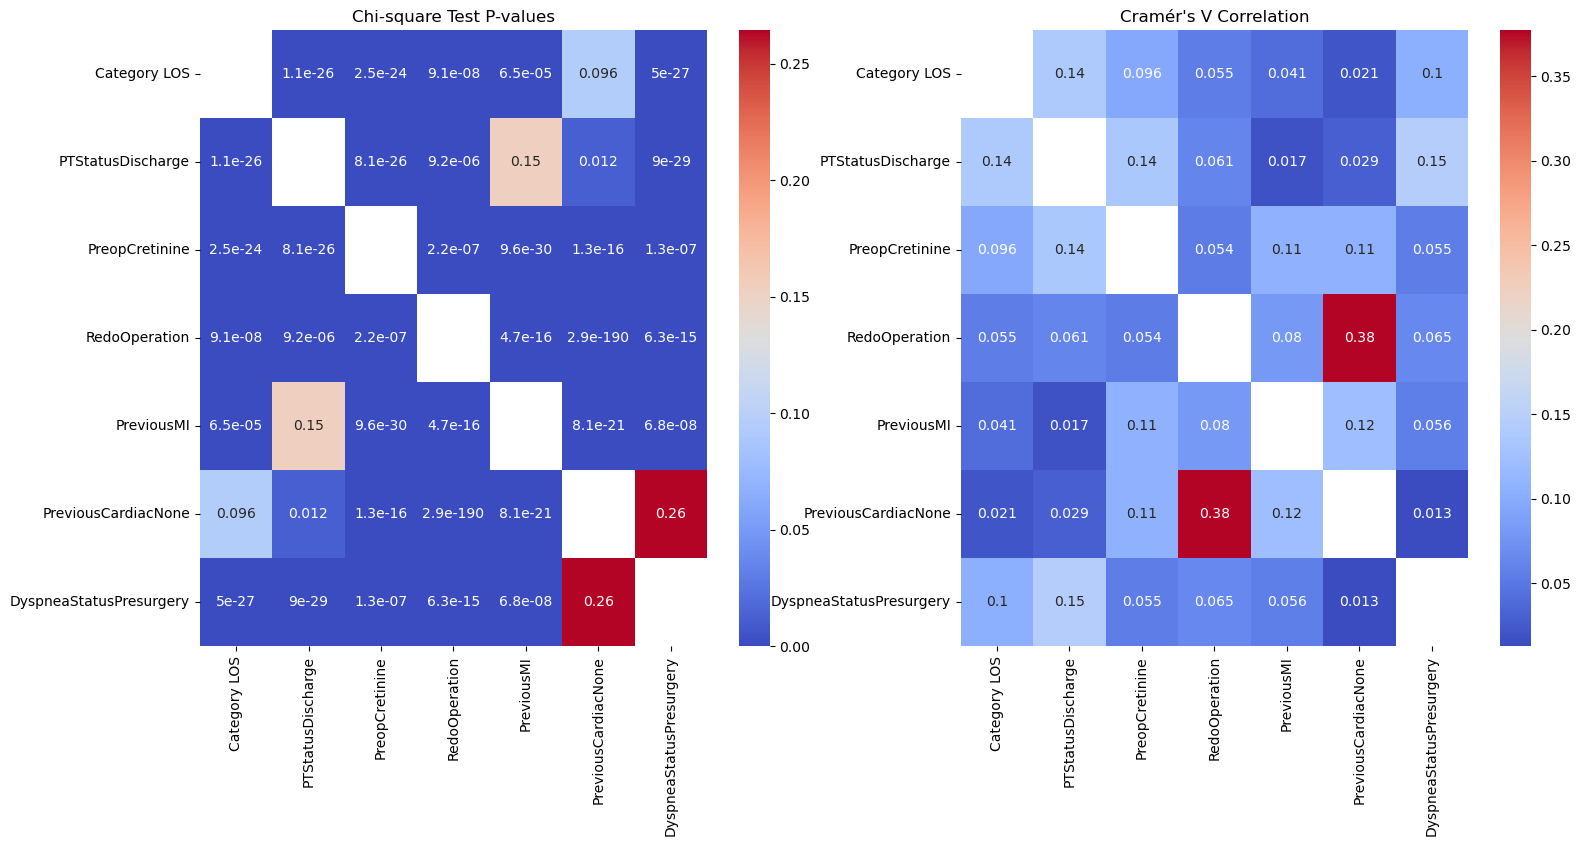

In [85]:
# List of categorical columns to analyze
categorical_columns = ['Category LOS', 'PTStatusDischarge',"PreopCretinine","RedoOperation","PreviousMI",
                       "PreviousCardiacNone","DyspneaStatusPresurgery"]

# Ensure all columns are categorical
for col in categorical_columns:
    df_cleaned[col] = df_cleaned[col].astype('category')

# Calculate matrices
chi2_matrix, cramers_v_matrix = calculate_cramers_v_matrix(df_cleaned, categorical_columns)

# Plot heatmaps
plot_heatmaps(chi2_matrix, cramers_v_matrix)

C:\Users\afiq_\AppData\Local\Temp\ipykernel_20620\1685173723.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype('category')
C:\Users\afiq_\AppData\Local\Temp\ipykernel_20620\1685173723.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype('category')
C:\Users\afiq_\AppData\Local\Temp\ipykernel_20620\1685173723.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

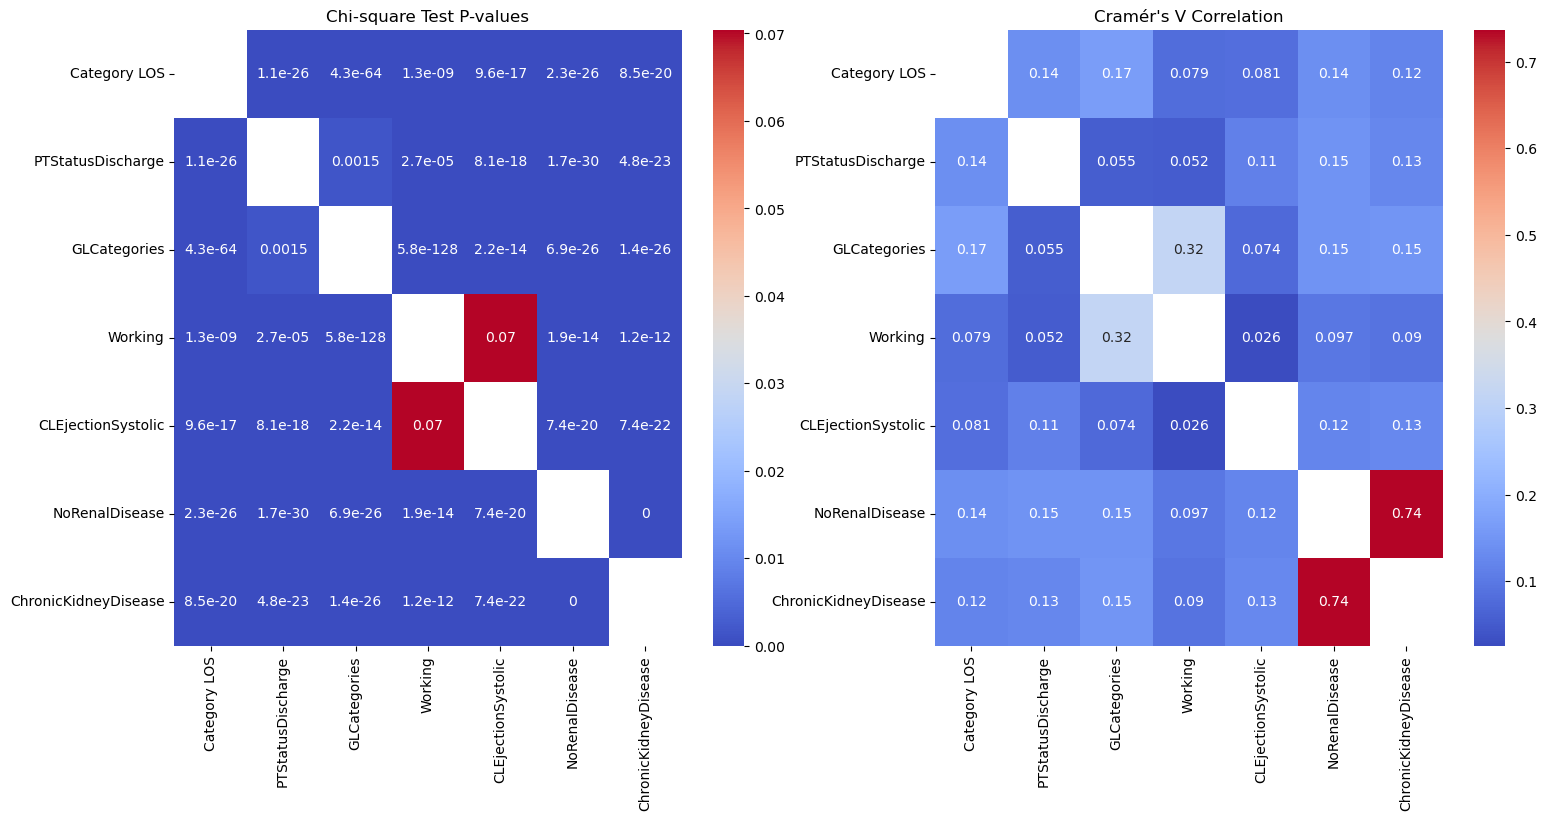

In [86]:
# List of categorical columns to analyze
categorical_columns = ['Category LOS', 'PTStatusDischarge', "GLCategories","Working","CLEjectionSystolic",
                       "NoRenalDisease", "ChronicKidneyDisease"]

# Ensure all columns are categorical
for col in categorical_columns:
    df_cleaned[col] = df_cleaned[col].astype('category')

# Calculate matrices
chi2_matrix, cramers_v_matrix = calculate_cramers_v_matrix(df_cleaned, categorical_columns)

# Plot heatmaps
plot_heatmaps(chi2_matrix, cramers_v_matrix)